Buckley–Leverett Analysis: 
𝑆
S vs. 
𝑣
𝐷
v 
D
​
 
The Buckley–Leverett equation expresses conservation of water saturation under waterflooding conditions:

𝜙
 
∂
𝑆
∂
𝑡
+
𝑞
𝑡
 
∂
𝑓
𝑤
(
𝑆
)
∂
𝑥
=
0
,
ϕ 
∂t
∂S
​
 +q 
t
​
  
∂x
∂f 
w
​
 (S)
​
 =0,
where 
𝑓
𝑤
(
𝑆
)
f 
w
​
 (S) is the fractional flow function—defined as the ratio of water mobility to the total mobility—and is typically an S-shaped function of saturation. By transforming the equation into dimensionless form (using 
𝑥
𝐷
=
𝑥
/
𝐿
x 
D
​
 =x/L and a dimensionless time based on the pore volumes injected), the governing equation simplifies considerably. The analytical solution in this framework comprises three distinct segments:

A constant state near the injection point where the saturation is at its maximum (
𝑆
=
𝑆
∗
S=S 
∗
 ).
A shock region where a discontinuity develops, determined by the tangent construction—yielding a shock speed 
𝑣
𝑠
=
Δ
𝑓
𝑤
/
Δ
𝑆
v 
s
​
 =Δf 
w
​
 /ΔS that is derived from conservation of mass.
A rarefaction wave where the saturation changes smoothly, corresponding to the derivative of the fractional flow function.

Calculating Se for each Co2 saturation

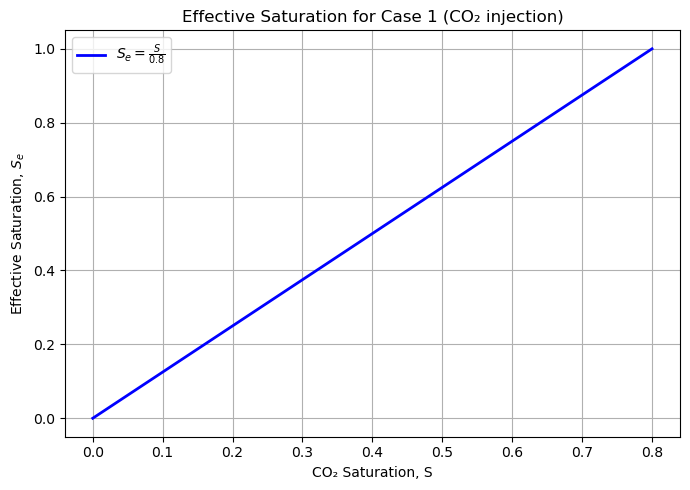

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# PARAMETERS FOR CASE 1
# -------------------------------
S1i = 0.0         # Initial CO2 saturation (Phase 1)
S2r = 0.2         # Residual water saturation
S_inj = 1.0 - S2r # Injected CO2 saturation, i.e., maximum CO2 saturation = 0.8

def effective_saturation(S, S_r1, S_r2):
    """
    Calculate the effective saturation:
      S_e = (S - S_r1) / (1 - S_r1 - S_r2)
    For Case 1, S_r1 = 0 (initial CO2 saturation) and S_r2 = 0.2.
    """
    return (S - S_r1) / (1 - S_r1 - S_r2)

# Create a range of CO2 saturations from the initial to the injected value
S_vals = np.linspace(S1i, S_inj, 100)
Se_vals = effective_saturation(S_vals, S1i, S2r)

# Plot Effective Saturation vs. CO2 Saturation
plt.figure(figsize=(7,5))
plt.plot(S_vals, Se_vals, "b-", linewidth=2, label=r"$S_e = \frac{S}{0.8}$")
plt.xlabel("CO₂ Saturation, S")
plt.ylabel("Effective Saturation, $S_e$")
plt.title("Effective Saturation for Case 1 (CO₂ injection)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


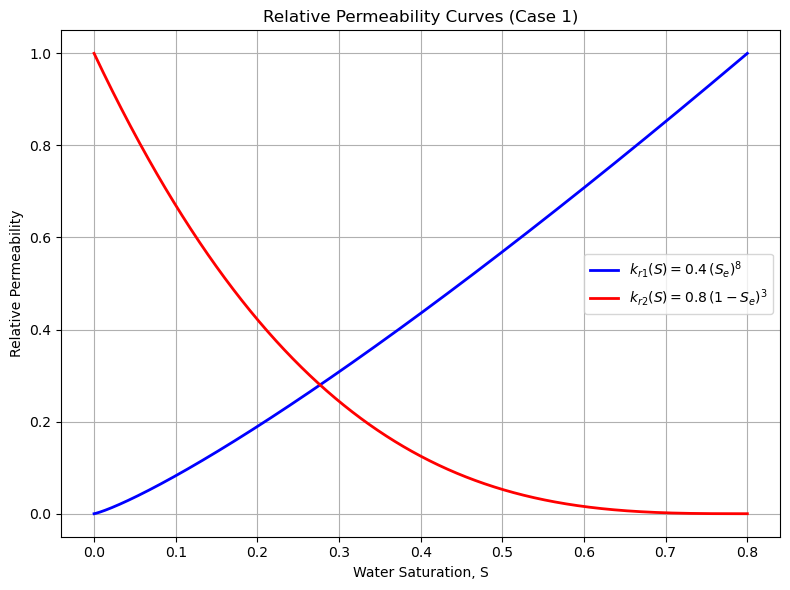

/tmp/ipykernel_22871/621371631.py:80: RuntimeWarning: divide by zero encountered in divide
  return 1.0 / (1.0 + (mu_1/mu_2) * (kr2/kr1))


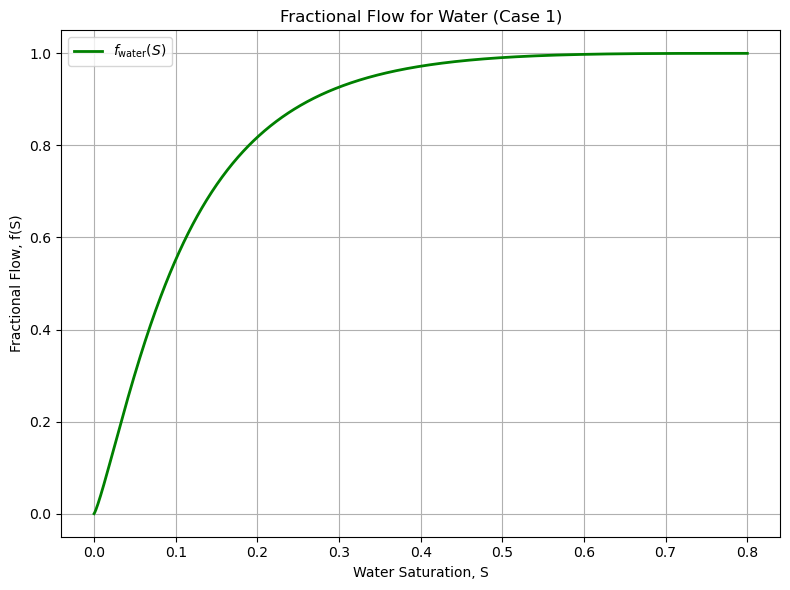

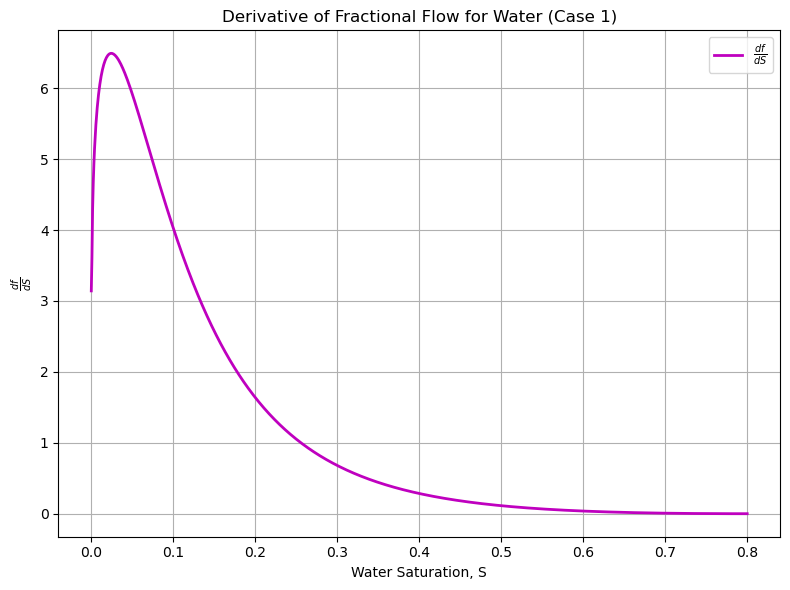

Results DataFrame (first 10 rows):
          S  kr_water    kr_CO2   f_water     df_dS
0  0.000000  0.000000  1.000000  0.000000  3.142011
1  0.000801  0.000251  0.997000  0.002516  3.608252
2  0.001602  0.000578  0.994006  0.005779  4.294852
3  0.002402  0.000940  0.991018  0.009395  4.668701
4  0.003203  0.001327  0.988036  0.013256  4.940661
5  0.004004  0.001735  0.985060  0.017308  5.155400
6  0.004805  0.002159  0.982090  0.021513  5.332338
7  0.005606  0.002598  0.979126  0.025848  5.481972
8  0.006406  0.003050  0.976168  0.030293  5.610719
9  0.007207  0.003512  0.973216  0.034834  5.722825


In [130]:
# ---------------------------
# Parameters for Case 1
# ---------------------------
S1i   = 0.0         # Initial CO₂ saturation (Phase 1)
S2r   = 0.2         # Residual water saturation (Phase 2)
S_inj = 1.0 - S2r   # Injected CO₂ saturation, so S_inj = 0.8

a = 1.2             # Exponent for CO₂ (Phase 1) relative permeability
b = 3.0             # Exponent for water (Phase 2) relative permeability

mu_1   = 0.1        # Viscosity of CO₂ (Phase 1) [mPa·s]
mu_2   = 1.0        # Viscosity of water (Phase 2) [mPa·s]

kr1_star = 1      # Maximum relative permeability for CO₂ (Phase 1)
kr2_star = 1      # Maximum relative permeability for water (Phase 2)

# Create an array of water saturation values from S1i to S_inj
S_vals = np.linspace(S1i, S_inj, 1000)

# ---------------------------
# Effective Saturation Function
# ---------------------------
def effective_saturation(S, S_r1, S_r2):
    """
    Calculate effective saturation:
      S_e = (S - S_r1) / (1 - S_r1 - S_r2)
    For Case 1, S_r1 = 0 and S_r2 = 0.2, so S_e = S / 0.8.
    """
    return (S - S_r1) / (1 - S_r1 - S_r2)

# ---------------------------
# Relative Permeability Functions
# ---------------------------
def kr_phase1(S):
    """
    Relative permeability for CO₂ (Phase 1):
      k_{r1}(S) = S_e^a.
    """
    Se = effective_saturation(S, S1i, S2r)
    Se = np.clip(Se, 0, 1)
    return Se**a

def kr_phase2(S):
    """
    Relative permeability for water (Phase 2):
      k_{r2}(S) = (1 - S_e)^b.
    """
    Se = effective_saturation(S, S1i, S2r)
    Se = np.clip(Se, 0, 1)
    return (1 - Se)**b

# Compute relative permeability arrays
kr_water_vals = kr_phase1(S_vals)
kr_co2_vals   = kr_phase2(S_vals)

# --- Plot Relative Permeability Curves ---
plt.figure(figsize=(8,6))
plt.plot(S_vals, kr_water_vals, 'b-', linewidth=2, label=r"$k_{r1}(S)=0.4\,(S_e)^8$")
plt.plot(S_vals, kr_co2_vals, 'r-', linewidth=2, label=r"$k_{r2}(S)=0.8\,(1-S_e)^3$")
plt.xlabel("Water Saturation, S")
plt.ylabel("Relative Permeability")
plt.title("Relative Permeability Curves (Case 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------------------------
# Advective Fractional Flow Function for CO₂ (f1)
# ---------------------------
def f_adv(S):
    """
    Computes the advective fractional flow for CO₂ (Phase 1) using:
      f(S) = 1 / [1 + (mu_1/mu_2) * (kr_phase1(S)/kr_phase2(S))]
    Note: Here, we use (kr_phase2/kr_phase1) in the denominator 
    because that correctly produces f(0)=0 and f(S_inj)=1.
    """
    kr1 = kr_phase1(S_vals)
    kr2 = kr_phase2(S_vals) + 1e-16  # to avoid division by zero
    return 1.0 / (1.0 + (mu_1/mu_2) * (kr2/kr1))

# ---------------------------
# Compute f1 vs. S and Save Results to a Table
# ---------------------------
f_vals = f_adv(S_vals)

# --- Plot Fractional Flow vs. S ---
plt.figure(figsize=(8,6))
plt.plot(S_vals, f_vals, 'g-', linewidth=2, label=r"$f_{\mathrm{water}}(S)$")
plt.xlabel("Water Saturation, S")
plt.ylabel("Fractional Flow, f(S)")
plt.title("Fractional Flow for Water (Case 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# Compute the Derivative df/dS
# ============================================================
dfdS_vals = np.gradient(f_vals, S_vals)

# --- Plot Derivative df/dS vs. S ---
plt.figure(figsize=(8,6))
plt.plot(S_vals, dfdS_vals, 'm-', linewidth=2, label=r"$\frac{df}{dS}$")
plt.xlabel("Water Saturation, S")
plt.ylabel(r"$\frac{df}{dS}$")
plt.title("Derivative of Fractional Flow for Water (Case 1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# SAVE RESULTS TO A DATAFRAME
# ============================================================

results_df = pd.DataFrame({
    'S': S_vals,
    'kr_water': kr_water_vals,
    'kr_CO2': kr_co2_vals,
    'f_water': f_vals,
    'df_dS': dfdS_vals
})

print("Results DataFrame (first 10 rows):")
print(results_df.head(10))


/tmp/ipykernel_22871/2339692180.py:14: RuntimeWarning: invalid value encountered in divide
  y_vals = np.where(np.isclose(denom, 0.0), np.nan, f_vals / denom)


Last intersection at S = 0.0453, with v = 6.0763


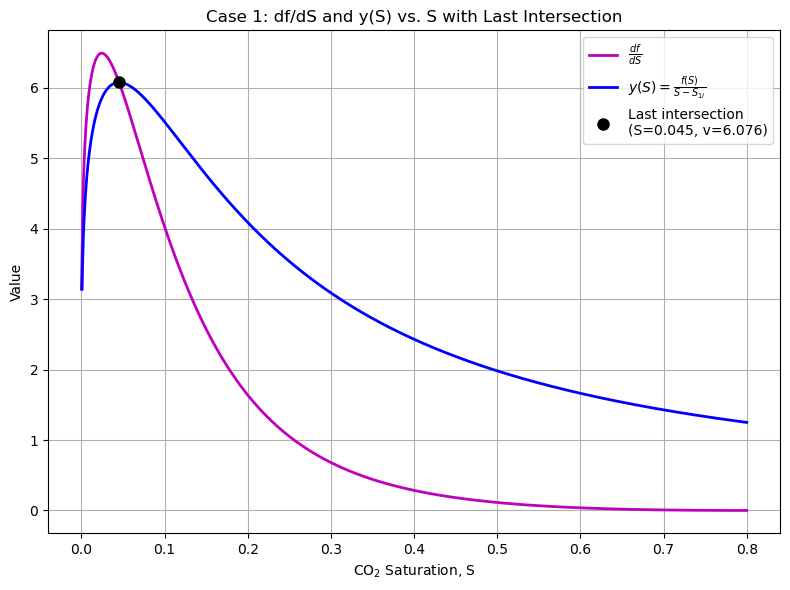


First few rows of the combined table:
     S_vals   f1_vals  dfdS_vals    y_vals
0  0.000000  0.000000   3.142011       NaN
1  0.000801  0.002516   3.608252  3.142011
2  0.001602  0.005779   4.294852  3.608252
3  0.002402  0.009395   4.668701  3.910572
4  0.003203  0.013256   4.940661  4.138476
5  0.004004  0.017308   5.155400  4.322607
6  0.004805  0.021513   5.332338  4.477451
7  0.005606  0.025848   5.481972  4.611102
8  0.006406  0.030293   5.610719  4.728581
9  0.007207  0.034834   5.722825  4.833239


In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assume these arrays are already computed:
# S_vals: CO₂ saturation values (e.g., from 0 to 0.8 for Case 1)
# f1_vals: fractional flow values for CO₂ (from your f_water, etc.)
# dfdS_vals: derivative of f1_vals with respect to S_vals (v_D = df/dS)
# For Case 1, S1i = 0.
S1i = 0.0

# Compute y(S) = f1_vals/(S_vals - S1i), taking care of division by zero.
denom = S_vals - S1i
y_vals = np.where(np.isclose(denom, 0.0), np.nan, f_vals / denom)

# Plot both curves
plt.figure(figsize=(8,6))
plt.plot(S_vals, dfdS_vals, 'm-', linewidth=2, label=r"$\frac{df}{dS}$")
plt.plot(S_vals, y_vals, 'b-', linewidth=2, label=r"$y(S)=\frac{f(S)}{S-S_{1i}}$")

# Find the intersection: we want the last intersection where these curves cross.
# Compute the difference between the curves.
diff = dfdS_vals - y_vals

# Find indices where the difference changes sign.
crossing_indices = np.where(np.diff(np.sign(diff)))[0]

if len(crossing_indices) > 0:
    # Take the last crossing
    i = crossing_indices[-1]
    s_low = S_vals[i]
    s_high = S_vals[i+1]
    diff_low = diff[i]
    diff_high = diff[i+1]
    
    # Linear interpolation for the intersection S value.
    S_int = s_low - diff_low * (s_high - s_low) / (diff_high - diff_low)
    
    # Also interpolate the corresponding value (v) from dfdS_vals.
    v_low = dfdS_vals[i]
    v_high = dfdS_vals[i+1]
    v_int = v_low + (v_high - v_low) * ((S_int - s_low) / (s_high - s_low))
    
    plt.plot(S_int, v_int, 'ko', markersize=8, label=f"Last intersection\n(S={S_int:.3f}, v={v_int:.3f})")
    print(f"Last intersection at S = {S_int:.4f}, with v = {v_int:.4f}")
else:
    print("No intersection found between the curves.")

plt.xlabel("CO$_2$ Saturation, S")
plt.ylabel("Value")
plt.title("Case 1: df/dS and y(S) vs. S with Last Intersection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save the data in a DataFrame for inspection.
derivative_table = pd.DataFrame({
    'S_vals': S_vals,
    'f1_vals': f_vals,
    'dfdS_vals': dfdS_vals,
    'y_vals': y_vals
})
print("\nFirst few rows of the combined table:")
print(derivative_table.head(10))


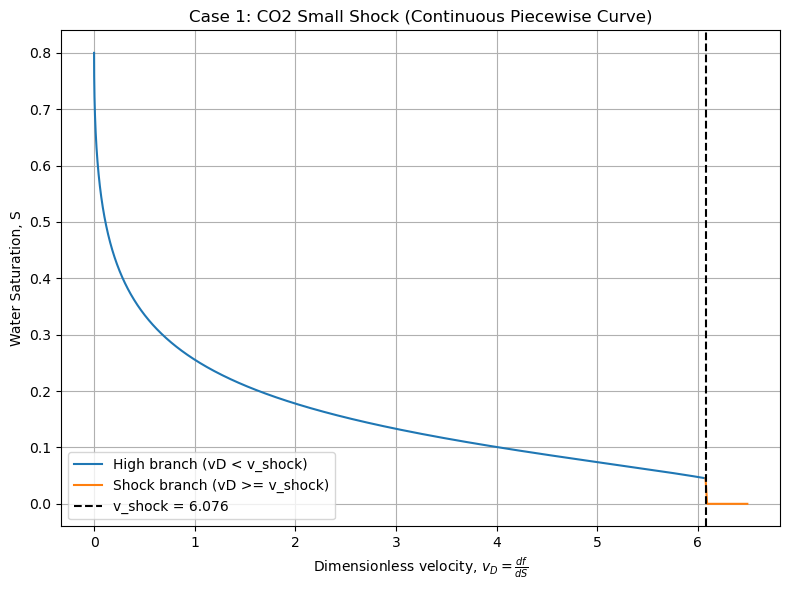

In [143]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose these come from your calculations:
# v_int   = v_shock  (intersection velocity)
# S_int               (intersection saturation)
# derivative_table    (DataFrame with columns "dfdS_vals" and "S_vals")

vD_array = derivative_table["dfdS_vals"].to_numpy()
S_array  = derivative_table["S_vals"].to_numpy()

# 1) Select the "high branch" region (vD < v_int and S > S_int)
mask_high = (vD_array < v_int) & (S_array > S_int)
vD_high_branch = vD_array[mask_high]
S_high_branch  = S_array[mask_high]

# 2) Sort by vD so that we plot in ascending order
idx_sort = np.argsort(vD_high_branch)
vD_high_branch = vD_high_branch[idx_sort]
S_high_branch  = S_high_branch[idx_sort]

# 3) Append the intersection point to ensure a clean endpoint
vD_high_branch = np.append(vD_high_branch, v_int)
S_high_branch  = np.append(S_high_branch,  S_int)

# 4) Create the shock branch for vD >= v_int
mask_shock = (vD_array >= v_int)
vD_shock_branch = vD_array[mask_shock]
S_shock_branch  = np.full_like(vD_shock_branch, 0)  # for example, S1i=0.0

# 5) Sort the shock branch by vD as well
idx_shock_sort = np.argsort(vD_shock_branch)
vD_shock_branch = vD_shock_branch[idx_shock_sort]
S_shock_branch  = S_shock_branch[idx_shock_sort]

# 6) Extend the shock branch so it starts at (v_int, S_int) or (v_int, 0.0)
vD_shock_extended = np.concatenate(([v_int], vD_shock_branch))
S_shock_extended  = np.concatenate(([S_int], S_shock_branch))

# 7) Plot the two-piece solution
plt.figure(figsize=(8,6))

plt.plot(vD_high_branch, S_high_branch, label='High branch (vD < v_shock)')
plt.plot(vD_shock_extended, S_shock_extended, label='Shock branch (vD >= v_shock)')

plt.axvline(v_int, color='k', linestyle='--', label=f"v_shock = {v_int:.3f}")
plt.xlabel(r"Dimensionless velocity, $v_D = \frac{df}{dS}$")
plt.ylabel("Water Saturation, S")
plt.title("Case 1: CO2 Small Shock (Continuous Piecewise Curve)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Create DataFrame for the high branch:
df_high = pd.DataFrame({
    'vD': vD_high_branch,
    'S': S_high_branch,
    'branch': 'high'
})

# Create DataFrame for the shock branch:
df_shock = pd.DataFrame({
    'vD': vD_shock_extended,
    'S': S_shock_extended,
    'branch': 'shock'
})

# Combine them:
case1df_anal = pd.concat([df_high, df_shock], ignore_index=True)


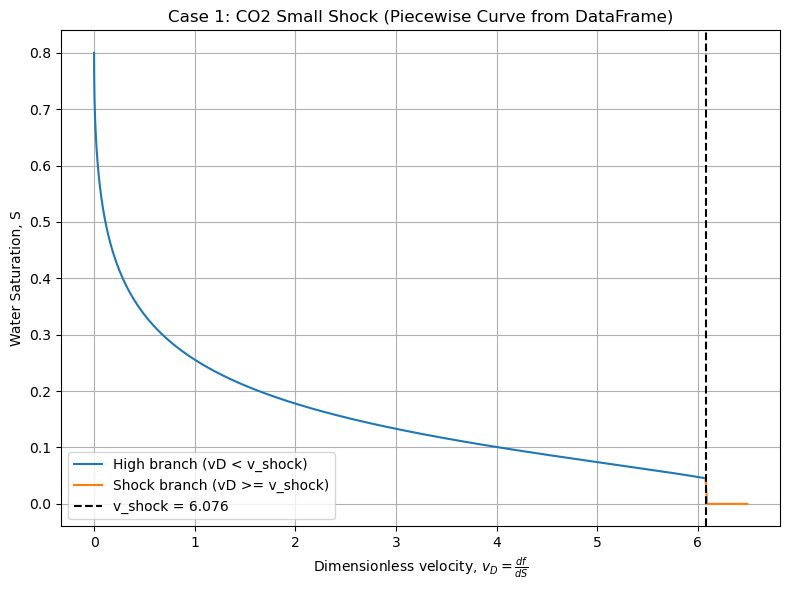

In [144]:
plt.figure(figsize=(8,6))
plt.plot(case1df_anal.loc[case1df_anal['branch']=='high', 'vD'],
         case1df_anal.loc[case1df_anal['branch']=='high', 'S'],
         label='High branch (vD < v_shock)')
plt.plot(case1df_anal.loc[case1df_anal['branch']=='shock', 'vD'],
         case1df_anal.loc[case1df_anal['branch']=='shock', 'S'],
         label='Shock branch (vD >= v_shock)')
plt.axvline(v_int, color='k', linestyle='--', label=f"v_shock = {v_int:.3f}")
plt.xlabel(r"Dimensionless velocity, $v_D = \frac{df}{dS}$")
plt.ylabel("Water Saturation, S")
plt.title("Case 1: CO2 Small Shock (Piecewise Curve from DataFrame)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

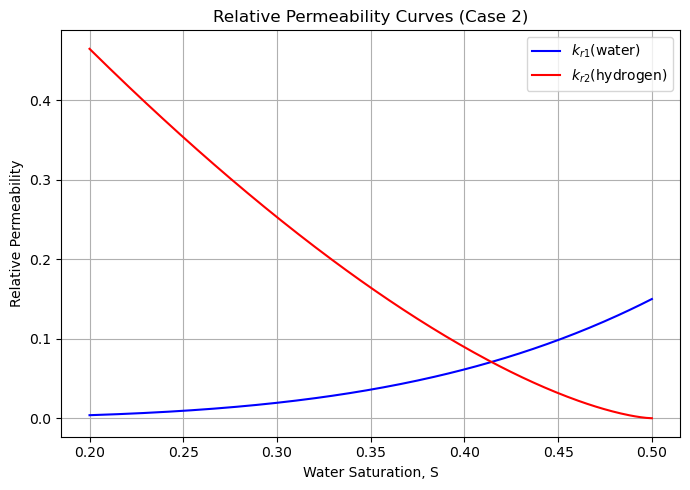

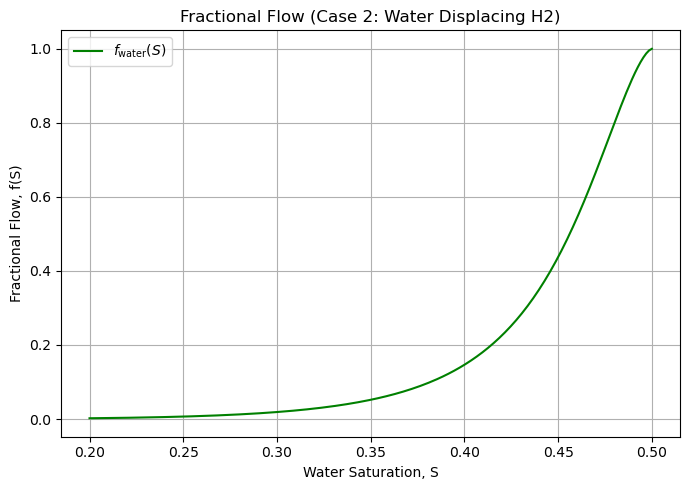


First few rows of the results DataFrame:
          S        Se  kr1_water  kr2_hydrogen   f_water         df_dS
0  0.200000  0.400000   0.003840      0.464758  0.002061  1.614901e-16
1  0.201508  0.403015   0.003957      0.461259  0.002140  2.200211e-15
2  0.203015  0.406030   0.004077      0.457769  0.002222  5.356872e-14
3  0.204523  0.409045   0.004199      0.454288  0.002306  5.400143e-13
4  0.206030  0.412060   0.004324      0.450816  0.002392  3.226997e-12
5  0.207538  0.415075   0.004452      0.447352  0.002482  1.378317e-11
6  0.209045  0.418090   0.004583      0.443898  0.002575  4.665834e-11
7  0.210553  0.421106   0.004717      0.440453  0.002670  1.333051e-10
8  0.212060  0.424121   0.004853      0.437016  0.002769  3.348605e-10
9  0.213568  0.427136   0.004993      0.433588  0.002871  7.605441e-10


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =========================================================
# 1) CASE 2 PARAMETERS
# =========================================================
# According to the PDF table for Case 2:
#  - Phase 1 = Water => mu1 = 1.0 [mPa·s]
#  - Phase 2 = Hydrogen => mu2 = 0.1 [mPa·s]
#  - a = 4 (for water rel-perm exponent)
#  - b = 1.5 (for hydrogen rel-perm exponent)
#  - S1i = 0.2 (initial water saturation)
#  - S2r = 0.5 (residual hydrogen saturation)
#  - Hence, the injected water saturation S_inj = 1 - S2r = 0.5
# We'll consider S from S1i=0.2 to S_inj=0.5.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------
# A) PARAMETERS FOR CASE 2
# ------------------------------------------------
mu_w = 1.0e-3       # viscosity of water (Phase 1)
mu_h = 0.1e-3       # viscosity of hydrogen (Phase 2)
a = 4.0          # exponent for water rel-perm
b = 1.5          # exponent for hydrogen rel-perm
kr1_star = 0.15
kr2_star = 1.0

S1i = 0.2        # initial water saturation
S2r = 0.5        # residual hydrogen
S_inj = 1.0 - S2r  # injected water sat => 0.5

# ------------------------------------------------
# B) EFFECTIVE SATURATION & RELATIVE PERMS
# ------------------------------------------------
def effective_saturation(S, Sr1=0.0, Sr2=S2r):
    """
    For Case 2, PDF suggests Sr1=0, Sr2=0.5
    => S_e = (S - 0) / (1 - 0 - 0.5) =  S / 0.5
    """
    return (S - Sr1)/(1 - Sr1 - Sr2)

def kr1_water(S):
    """
    k_{r1}(S) = (S_e)^a, with a=4
    """
    Se = effective_saturation(S, 0.0, S2r)
    Se = np.clip(Se, 0, 1)
    return kr1_star*Se**a

def kr2_h2(S):
    """
    k_{r2}(S) = (1 - S_e)^b, with b=1.5
    """
    Se = effective_saturation(S, 0.0, S2r)
    Se = np.clip(Se, 0, 1)
    return kr2_star*(1.0 - Se)**b

# Compute kr1, kr2 arrays
kr1_vals = kr1_water(S_vals)
kr2_vals = kr2_h2(S_vals)

# --- Plot RELATIVE PERMEABILITY curves ---
plt.figure(figsize=(7,5))
plt.plot(S_vals, kr1_vals, 'b-', label=r"$k_{r1}(\mathrm{water})$")
plt.plot(S_vals, kr2_vals, 'r-', label=r"$k_{r2}(\mathrm{hydrogen})$")
plt.xlabel("Water Saturation, S")
plt.ylabel("Relative Permeability")
plt.title("Relative Permeability Curves (Case 2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =========================================================
# 3) FRACTIONAL FLOW FOR WATER (PHASE 1)
# =========================================================
def f_water(S):
    """
    Fractional flow of water (Phase 1) for advective flow:
      f(S) = [kr1(S)/mu1] / [ (kr1(S)/mu1) + (kr2(S)/mu2 ) ]
            = 1 / [ 1 + (mu1/mu2)*(kr2/kr1) ]
    """
    kr1 = kr1_water(S) + 1e-16
    kr2 = kr2_h2(S) + 1e-16
    return (kr1/mu1) / ((kr1/mu1) + (kr2/mu2))

f_vals = f_water(S_vals)

# --- Plot f vs. S ---
plt.figure(figsize=(7,5))
plt.plot(S_vals, f_vals, 'g-', label=r"$f_\mathrm{water}(S)$")
plt.xlabel("Water Saturation, S")
plt.ylabel("Fractional Flow, f(S)")
plt.title("Fractional Flow (Case 2: Water Displacing H2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# =========================================================
# 5) SAVE RESULTS TO A DATAFRAME
# =========================================================
# Let's put S, Se, kr1, kr2, f, df/dS into a table
Se_vals = effective_saturation(S_vals, 0.0, S2r)
results_df = pd.DataFrame({
    'S': S_vals,
    'Se': Se_vals,
    'kr1_water': kr1_vals,
    'kr2_hydrogen': kr2_vals,
    'f_water': f_vals,
    'df_dS': dfdS_vals
})

print("\nFirst few rows of the results DataFrame:")
print(results_df.head(10))

# Optional: save to CSV if desired
# results_df.to_csv("case2_step_by_step.csv", index=False)


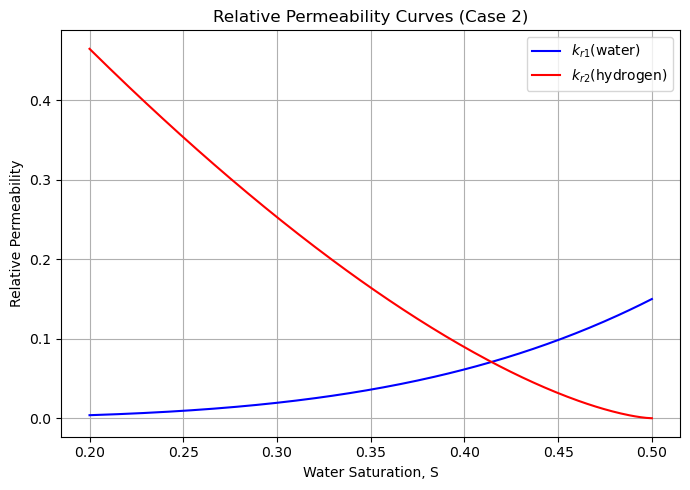

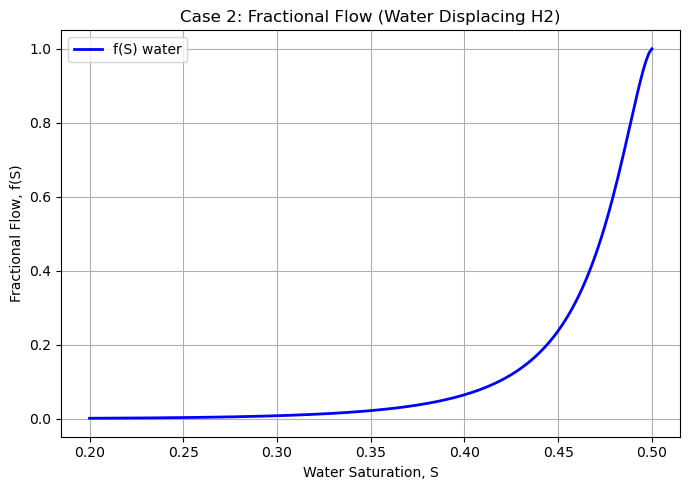

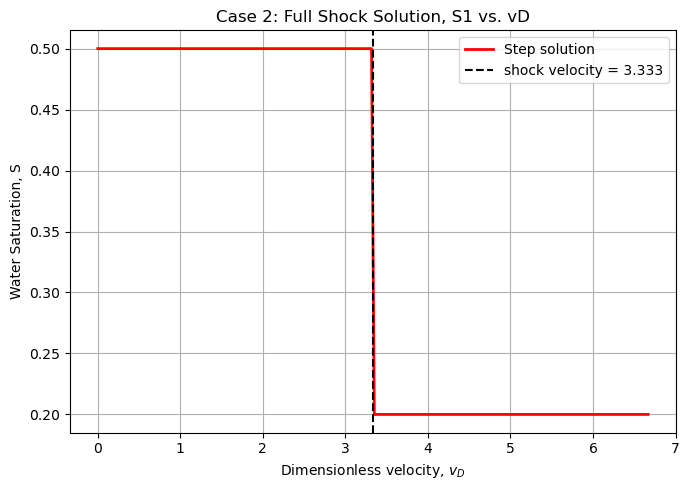


Fractional Flow DataFrame (first 10 rows):
          S   f_water
0  0.200000  0.000826
1  0.201508  0.000857
2  0.203015  0.000890
3  0.204523  0.000924
4  0.206030  0.000958
5  0.207538  0.000994
6  0.209045  0.001031
7  0.210553  0.001070
8  0.212060  0.001109
9  0.213568  0.001150

Shock Solution DataFrame (first 10 rows):
         vD  S_step
0  0.000000     0.5
1  0.033501     0.5
2  0.067002     0.5
3  0.100503     0.5
4  0.134003     0.5
5  0.167504     0.5
6  0.201005     0.5
7  0.234506     0.5
8  0.268007     0.5
9  0.301508     0.5


In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------
# A) PARAMETERS FOR CASE 2
# ------------------------------------------------
mu_w = 1.0e-3       # viscosity of water (Phase 1)
mu_h = 0.1e-3       # viscosity of hydrogen (Phase 2)
a = 4.0          # exponent for water rel-perm
b = 1.5          # exponent for hydrogen rel-perm
kr1_star = 0.15
kr2_star = 1.0

S1i = 0.2        # initial water saturation
S2r = 0.5        # residual hydrogen
S_inj = 1.0 - S2r  # injected water sat => 0.5

# ------------------------------------------------
# B) EFFECTIVE SATURATION & RELATIVE PERMS
# ------------------------------------------------
def effective_saturation(S, Sr1=0.0, Sr2=S2r):
    """
    For Case 2, PDF suggests Sr1=0, Sr2=0.5
    => S_e = (S - 0) / (1 - 0 - 0.5) =  S / 0.5
    """
    return (S - Sr1)/(1 - Sr1 - Sr2)

def kr_water(S):
    """
    k_{r1}(S) = (S_e)^a, with a=4
    """
    Se = effective_saturation(S, 0.0, S2r)
    Se = np.clip(Se, 0, 1)
    return kr1_star*Se**a

def kr_hydrogen(S):
    """
    k_{r2}(S) = (1 - S_e)^b, with b=1.5
    """
    Se = effective_saturation(S, 0.0, S2r)
    Se = np.clip(Se, 0, 1)
    return kr2_star*(1.0 - Se)**b


# --- Plot RELATIVE PERMEABILITY curves ---
plt.figure(figsize=(7,5))
plt.plot(S_vals, kr1_vals, 'b-', label=r"$k_{r1}(\mathrm{water})$")
plt.plot(S_vals, kr2_vals, 'r-', label=r"$k_{r2}(\mathrm{hydrogen})$")
plt.xlabel("Water Saturation, S")
plt.ylabel("Relative Permeability")
plt.title("Relative Permeability Curves (Case 2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------
# C) FRACTIONAL FLOW f1(S) FOR WATER (PHASE 1)
# ------------------------------------------------
def f_water(S):
    """
    f(S) = [kr_water(S)/mu_w] / { [kr_water(S)/mu_w] + [kr_hydrogen(S)/mu_h] }
         = 1 / [1 + (mu_w/mu_h)*(kr_hydrogen/kr_water)]
    """
    kr1 = kr_water(S) + 1e-16
    kr2 = kr_hydrogen(S) + 1e-16
    return (kr1/mu_w) / ((kr1/mu_w) + (kr2/mu_h))

# ------------------------------------------------
# 1) Compute fractional flow array
# ------------------------------------------------
S_vals = np.linspace(S1i, S_inj, 200)   # from 0.2 to 0.5
f_vals = f_water(S_vals)

# ------------------------------------------------
# 2) Compute shock velocity:
#    v_shock = max( f(S) ) / [1 - S1i - S2r ]
# ------------------------------------------------
f_max = np.max(f_vals)
deltaS = 1.0 - S1i - S2r  # = 1 - 0.2 - 0.5 = 0.3
v_shock = f_max / deltaS

# ------------------------------------------------
# 3) Step function solution:
#    For vD < v_shock, S = S_inj
#    For vD >= v_shock, S = S1i
# ------------------------------------------------
v_vals = np.linspace(0, 2*v_shock, 200)
S_step = np.where(v_vals < v_shock, S_inj, S1i)

# ------------------------------------------------
# 4) Plot everything
# ------------------------------------------------
# A) Plot fractional flow vs. S
plt.figure(figsize=(7,5))
plt.plot(S_vals, f_vals, 'b-', linewidth=2, label='f(S) water')
plt.xlabel("Water Saturation, S")
plt.ylabel("Fractional Flow, f(S)")
plt.title("Case 2: Fractional Flow (Water Displacing H2)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# B) Plot the final step solution S1 vs. vD
plt.figure(figsize=(7,5))
plt.plot(v_vals, S_step, 'r-', linewidth=2, label='Step solution')
plt.axvline(v_shock, color='k', linestyle='--',
            label=f"shock velocity = {v_shock:.3f}")
plt.xlabel(r"Dimensionless velocity, $v_D$")
plt.ylabel("Water Saturation, S")
plt.title("Case 2: Full Shock Solution, S1 vs. vD")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------
# 5) OPTIONAL: Save results in a DataFrame
# ------------------------------------------------
df = pd.DataFrame({
    'S': S_vals,
    'f_water': f_vals
})
print("\nFractional Flow DataFrame (first 10 rows):")
print(df.head(10))

# Another DataFrame for the step solution
df_shock = pd.DataFrame({
    'vD': v_vals,
    'S_step': S_step
})
print("\nShock Solution DataFrame (first 10 rows):")
print(df_shock.head(10))


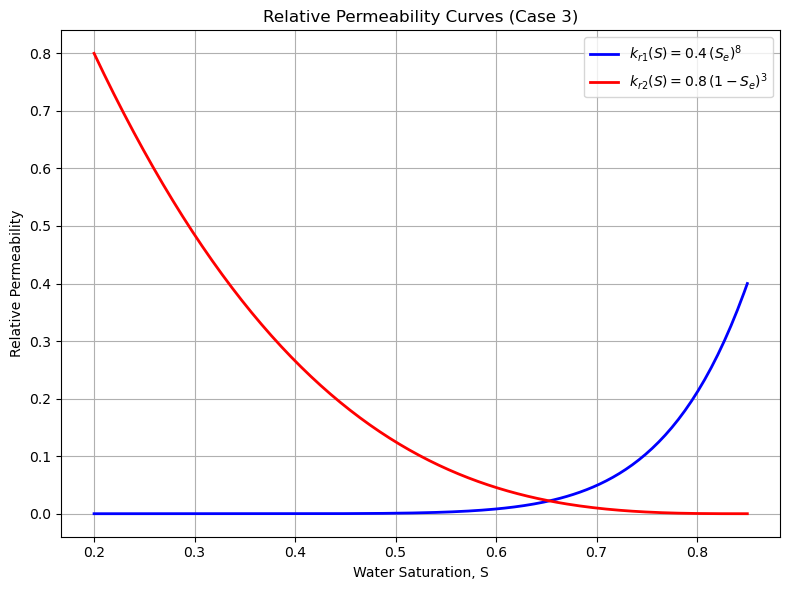

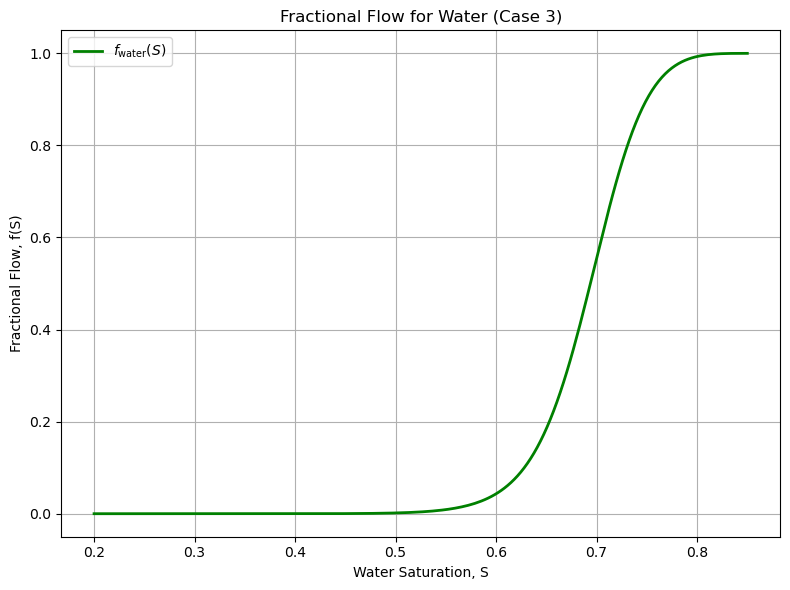

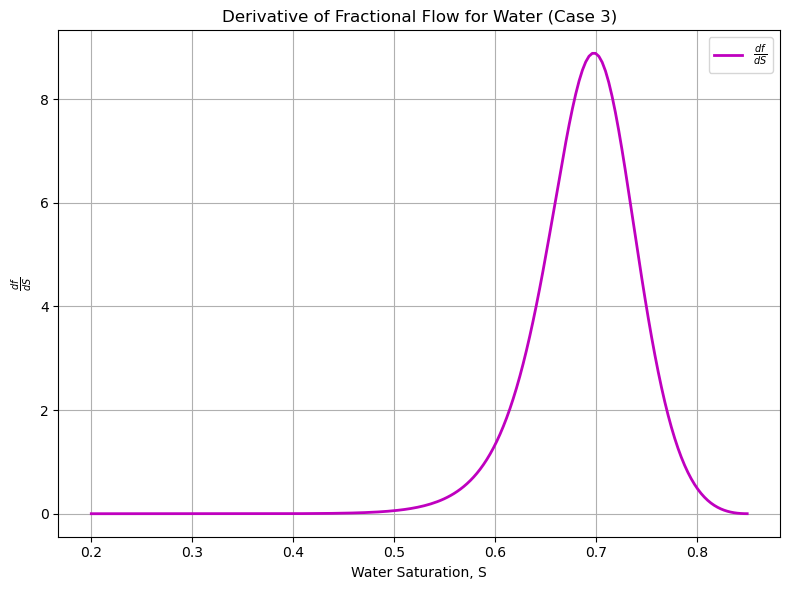

Results DataFrame (first 10 rows):
          S        Se      kr_water    kr_CO2       f_water         df_dS
0  0.200000  0.000000  0.000000e+00  0.800000  3.125000e-17  1.614901e-16
1  0.203266  0.005025  1.626430e-19  0.788000  3.177748e-17  2.200211e-15
2  0.206533  0.010050  4.163661e-17  0.776121  4.562324e-17  5.356872e-14
3  0.209799  0.015075  1.067101e-15  0.764362  3.817239e-16  5.400143e-13
4  0.213065  0.020101  1.065897e-14  0.752722  3.573355e-15  3.226997e-12
5  0.216332  0.025126  6.353242e-14  0.741201  2.146261e-14  1.378317e-11
6  0.219598  0.030151  2.731778e-13  0.729798  9.361418e-14  4.665834e-11
7  0.222864  0.035176  9.376045e-13  0.718513  3.262658e-13  1.333051e-10
8  0.226131  0.040201  2.728697e-12  0.707344  9.644514e-13  3.348605e-10
9  0.229397  0.045226  7.001248e-12  0.696292  2.513796e-12  7.605441e-10


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================
# CASE 3 PARAMETERS (Water displacing CO₂ in a depleted oil-field)
# ============================================================
# Phase 1: Water
mu1 = 0.4       # viscosity of water [mPa·s]
a   = 8.0       # exponent for water rel-perm
kr1_star = 0.4  # multiplier for water rel-perm

# Phase 2: CO₂
mu2 = 0.1       # viscosity of CO₂ [mPa·s]
b   = 3.0       # exponent for CO₂ rel-perm
kr2_star = 0.8  # multiplier for CO₂ rel-perm

# Saturation parameters:
S1i   = 0.2         # initial water saturation
S2r   = 0.15        # residual CO₂ saturation
S_inj = 1.0 - S2r   # injected water saturation = 0.85

# Create an array of water saturation values from S1i to S_inj
S_vals = np.linspace(S1i, S_inj, 200)

# ============================================================
# EFFECTIVE SATURATION & RELATIVE PERMEABILITY FUNCTIONS
# ============================================================
def effective_saturation(S, Sr1=S1i, Sr2=S2r):
    """
    Effective saturation:
      S_e = (S - S_{1i}) / (1 - S_{1i} - S_{2r})
          = (S - 0.2)/0.65.
    """
    return (S - Sr1) / (1.0 - Sr1 - Sr2)

def kr_water(S):
    """
    Relative permeability for water (Phase 1):
      k_{r1}(S) = kr1_star * (S_e)^a.
    """
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return kr1_star * (Se**a)

def kr_co2(S):
    """
    Relative permeability for CO₂ (Phase 2):
      k_{r2}(S) = kr2_star * (1 - S_e)^b.
    """
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return kr2_star * ((1 - Se)**b)

# Compute relative permeability arrays
kr_water_vals = kr_water(S_vals)
kr_co2_vals   = kr_co2(S_vals)

# --- Plot Relative Permeability Curves ---
plt.figure(figsize=(8,6))
plt.plot(S_vals, kr_water_vals, 'b-', linewidth=2, label=r"$k_{r1}(S)=0.4\,(S_e)^8$")
plt.plot(S_vals, kr_co2_vals, 'r-', linewidth=2, label=r"$k_{r2}(S)=0.8\,(1-S_e)^3$")
plt.xlabel("Water Saturation, S")
plt.ylabel("Relative Permeability")
plt.title("Relative Permeability Curves (Case 3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# FRACTIONAL FLOW FUNCTION FOR WATER (Phase 1)
# ============================================================
def f_water(S):
    """
    Fractional flow for water:
      f(S) = [kr_water(S)/mu1] / { [kr_water(S)/mu1] + [kr_co2(S)/mu2] }
           = 1 / [1 + (mu1/mu2) * (kr_co2(S)/kr_water(S)) ].
    """
    k1 = kr_water(S) + 1e-16  # add small number to avoid division by zero
    k2 = kr_co2(S) + 1e-16
    return (k1/mu1) / ((k1/mu1) + (k2/mu2))

# Compute fractional flow for water
f_vals = f_water(S_vals)

# --- Plot Fractional Flow vs. S ---
plt.figure(figsize=(8,6))
plt.plot(S_vals, f_vals, 'g-', linewidth=2, label=r"$f_{\mathrm{water}}(S)$")
plt.xlabel("Water Saturation, S")
plt.ylabel("Fractional Flow, f(S)")
plt.title("Fractional Flow for Water (Case 3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# Compute the Derivative df/dS
# ============================================================
dfdS_vals = np.gradient(f_vals, S_vals)

# --- Plot Derivative df/dS vs. S ---
plt.figure(figsize=(8,6))
plt.plot(S_vals, dfdS_vals, 'm-', linewidth=2, label=r"$\frac{df}{dS}$")
plt.xlabel("Water Saturation, S")
plt.ylabel(r"$\frac{df}{dS}$")
plt.title("Derivative of Fractional Flow for Water (Case 3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# SAVE RESULTS TO A DATAFRAME
# ============================================================
Se_vals = effective_saturation(S_vals)  # effective saturation values

results_df = pd.DataFrame({
    'S': S_vals,
    'Se': Se_vals,
    'kr_water': kr_water_vals,
    'kr_CO2': kr_co2_vals,
    'f_water': f_vals,
    'df_dS': dfdS_vals
})

print("Results DataFrame (first 10 rows):")
print(results_df.head(10))



/tmp/ipykernel_22871/2594836202.py:13: RuntimeWarning: divide by zero encountered in divide
  y_array = np.where(np.isclose(denominator, 0.0), np.nan, f_array / denominator)


Last intersection at S = 0.7747,  v_shock = 1.6839


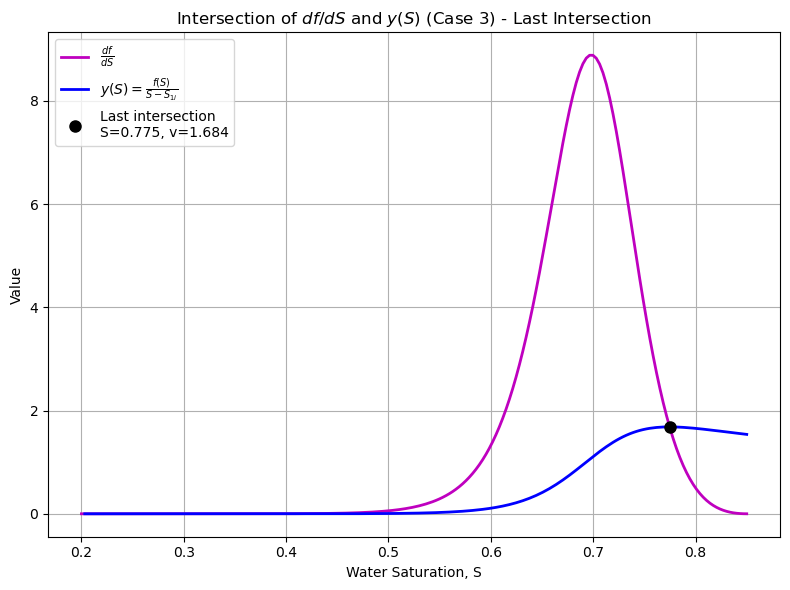

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Assume results_df is already defined with columns: "S", "f_water", "df_dS"
S_array    = results_df["S"].values      # water saturation array
f_array    = results_df["f_water"].values
dfdS_array = results_df["df_dS"].values

S1i = 0.2

# 1) Compute y(S) = f(S)/(S - S1i), set NaN if denominator=0
denominator = S_array - S1i
y_array = np.where(np.isclose(denominator, 0.0), np.nan, f_array / denominator)

# 2) Find the difference
diff = dfdS_array - y_array

# 3) Zero-crossing detection
#    crossing_indices holds all indices i where diff[i] and diff[i+1] have opposite signs
crossing_indices = np.where(np.diff(np.sign(diff)))[0]

if len(crossing_indices) > 0:
    # We want the last intersection => crossing_indices[-1]
    i = crossing_indices[-1]
    
    s_low, s_high = S_array[i], S_array[i+1]
    diff_low, diff_high = diff[i], diff[i+1]
    
    # Linear interpolation to find intersection saturation
    S_int = s_low - diff_low * (s_high - s_low) / (diff_high - diff_low)
    
    # Interpolate the corresponding df/dS value
    v_low, v_high = dfdS_array[i], dfdS_array[i+1]
    v_shock = v_low + (v_high - v_low) * ((S_int - s_low) / (s_high - s_low))
    
    print(f"Last intersection at S = {S_int:.4f},  v_shock = {v_shock:.4f}")
else:
    print("No intersection found between df/dS and y(S).")
    S_int = None
    v_shock = None

# 4) Plot both curves + intersection
plt.figure(figsize=(8,6))
plt.plot(S_array, dfdS_array, 'm-', linewidth=2, label=r"$\frac{df}{dS}$")
plt.plot(S_array, y_array, 'b-',  linewidth=2, label=r"$y(S)=\frac{f(S)}{S-S_{1i}}$")

if S_int is not None:
    plt.plot(S_int, v_shock, 'ko', markersize=8,
             label=f"Last intersection\nS={S_int:.3f}, v={v_shock:.3f}")

plt.xlabel("Water Saturation, S")
plt.ylabel("Value")
plt.title("Intersection of $df/dS$ and $y(S)$ (Case 3) - Last Intersection")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


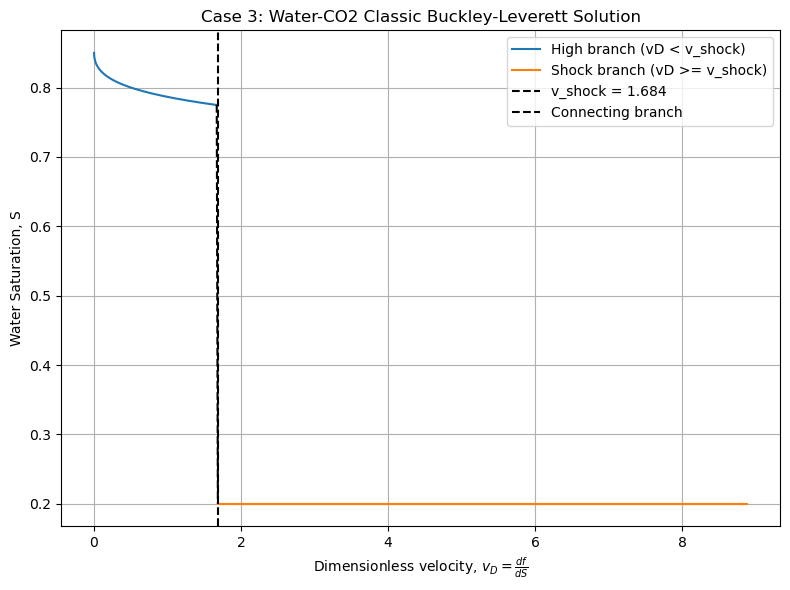

In [158]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------------
# 1) Assume we have arrays from results_df:
#    S_array    = results_df["S"]
vD_array   = results_df["df_dS"].values
#    S_int, v_shock from the intersection
#    S1i = 0.2 (Case 3 initial water saturation)
# ----------------------------------------------------------------

# Create a mask to keep only the "red circled" portion:
# i.e. vD < v_shock AND S > S_int
mask_high = (vD_array < v_shock) & (S_array > S_int)

# Extract that portion
S_high_branch = S_array[mask_high]
vD_high_branch = vD_array[mask_high]

# For vD >= v_shock, we define a separate array that is pinned at S1i
mask_shock = (vD_array >= v_shock)
vD_shock_branch = vD_array[mask_shock]
S_shock_branch = np.full_like(vD_shock_branch, 0.2)  # S1i = 0.2

# Extend the shock branch to start at v_shock:
vD_shock_extended = np.concatenate(([v_shock], vD_shock_branch))
S_shock_extended = np.concatenate(([0.2], S_shock_branch))

# ----------------------------------------------------------------
# 2) Plot the final piecewise solution
# ----------------------------------------------------------------
plt.figure(figsize=(8,6))

# Plot the "red circled" region: vD < v_shock and S > S_int
plt.plot(vD_high_branch, S_high_branch, label='High branch (vD < v_shock)')

# Plot the extended shock branch: starts at v_shock and stays constant at S1i
plt.plot(vD_shock_extended, S_shock_extended, label='Shock branch (vD >= v_shock)')

# Add vertical line for v_shock
plt.axvline(v_shock, color='k', linestyle='--', label=f"v_shock = {v_shock:.3f}")

# Connect high branch and shock branch.
# Here we take the point in the high branch with the largest vD value
if vD_high_branch.size > 0:
    idx = np.argmax(vD_high_branch)
    connect_v = vD_high_branch[idx]
    connect_S = S_high_branch[idx]
    # Draw a dashed line from the end of the high branch to (v_shock, S1i)
    plt.plot([connect_v, v_shock], [connect_S, 0.2], 'k--', label='Connecting branch')

plt.xlabel(r"Dimensionless velocity, $v_D = \frac{df}{dS}$")
plt.ylabel("Water Saturation, S")
plt.title("Case 3: Water-CO2 Classic Buckley-Leverett Solution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create DataFrame for the high branch:
df_high = pd.DataFrame({
    'vD': vD_high_branch,
    'S': S_high_branch,
    'branch': 'high'
})

# Create DataFrame for the shock branch:
df_shock = pd.DataFrame({
    'vD': vD_shock_extended,
    'S': S_shock_extended,
    'branch': 'shock'
})

# Combine them:
case3df_anal = pd.concat([df_high, df_shock], ignore_index=True)

Numerical Solution

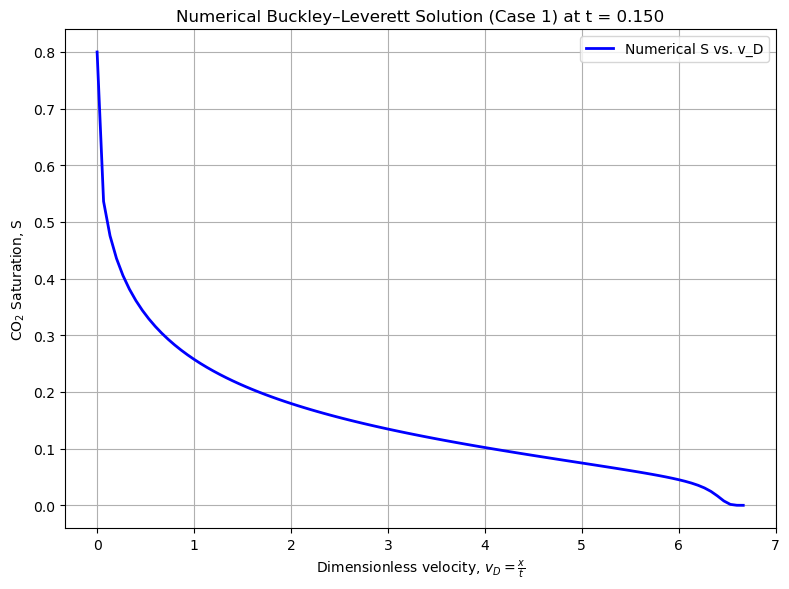

In [141]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1) Parameters (Dimensionless)
# ---------------------------
S1i = 0.0            # initial CO2 saturation in the reservoir (t=0, x>0)
S2r = 0.2            # residual water saturation
S_inj = 1.0 - S2r    # injected CO2 saturation at x=0 for t>0, so S_inj = 0.8

mu1 = 0.1            # viscosity of CO2 (Phase 1)
mu2 = 1.0            # viscosity of water (Phase 2)
a = 1.2              # exponent for CO2 relative permeability
b = 3.0              # exponent for water relative permeability

dx = 0.01            # delta_x (dimensionless)
dt = 0.001           # delta_t (dimensionless)
n_max = 150          # total number of time steps
T = n_max * dt       # final dimensionless time, T = 0.2

# ---------------------------
# 2) Define the Spatial Grid
# ---------------------------
L = 1.0              # dimensionless length of the domain
N = int(L/dx) + 1    # number of grid points
x = np.linspace(0, L, N)  # cell centers: x_0=0, x_N-1 = L

# ---------------------------
# 3) Define Functions for Relative Permeability and Fractional Flow
# ---------------------------
def effective_saturation(S):
    """Effective saturation for Case 1 (S1i=0, S2r=0.2)."""
    return S / (1 - S1i - S2r)   # = S/0.8

def kr_CO2(S):
    """Relative permeability of CO2 (Phase 1): k_r1(S) = S_e^a."""
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return Se**a

def kr_water(S):
    """Relative permeability of water (Phase 2): k_r2(S) = (1-S_e)^b."""
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return (1 - Se)**b

def f_CO2(S):
    """
    Fractional flow of CO2 (Phase 1):
      f(S) = 1/(1 + (mu1/mu2) * (kr_water(S)/kr_CO2(S)) ).
    """
    k1 = kr_CO2(S) + 1e-16  # avoid division by zero
    k2 = kr_water(S)  + 1e-16
    return 1.0 / (1.0 + (mu1/mu2)*(k2/k1))

# ---------------------------
# 4) Initialize the Saturation Array
# ---------------------------
# At t=0, for x>0, S = S1i (which is 0 for Case 1)
S = np.ones(N) * S1i

# Apply the boundary condition at x=0 for t>0: for n>=1, S[0] will be reset to S_inj
# (At t=0, we use initial condition; then at each time step, we enforce the boundary.)

# ---------------------------
# 5) Time Stepping Using the Upwind Scheme
# ---------------------------
for n in range(n_max):
    S_new = S.copy()
    # Enforce boundary condition at x=0: S(0,t) = S_inj
    S_new[0] = S_inj
    # Update interior cells: j=1,...,N-1
    for j in range(1, N):
        # Upwind flux: f_j = f_CO2(S[j]), f_jm1 = f_CO2(S[j-1])
        flux_j = f_CO2(S[j])
        flux_jm1 = f_CO2(S[j-1])
        S_new[j] = S[j] - (dt/dx) * (flux_j - flux_jm1)
    S = S_new.copy()

# ---------------------------
# 6) Compute the Similarity Variable v_D and Plot S vs. v_D
# ---------------------------
# At final time T, compute v_D = x/T (for each cell)
vD = x / T

plt.figure(figsize=(8,6))
plt.plot(vD, S, 'b-', linewidth=2, label='Numerical S vs. v_D')
plt.xlabel(r"Dimensionless velocity, $v_D = \frac{x}{t}$")
plt.ylabel("CO$_2$ Saturation, S")
plt.title("Numerical Buckley–Leverett Solution (Case 1) at t = {:.3f}".format(T))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

case1df_numerical = pd.DataFrame({
    'x': x,           # spatial locations
    'vD': vD,         # similarity variable (x/T)
    'S': S            # final saturation profile at T
})

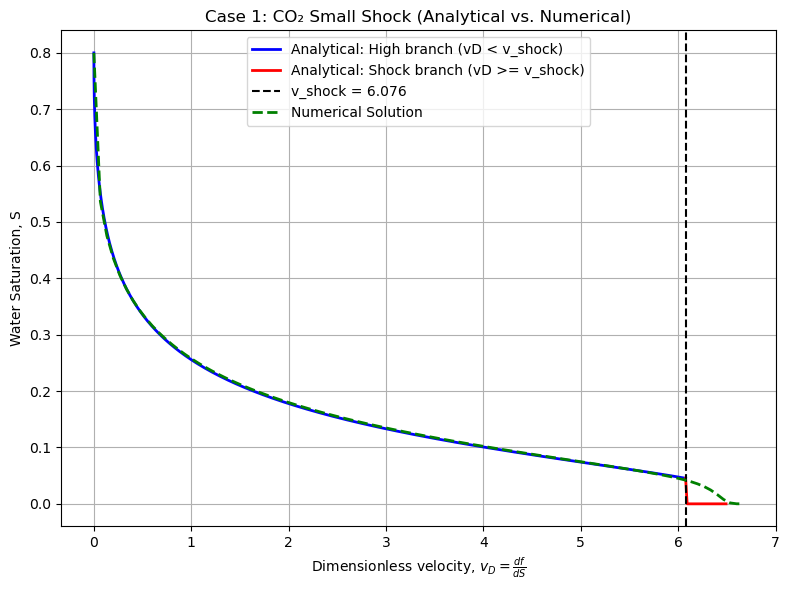

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plot Analytical Solution (from your case1df_anal DataFrame)
plt.plot(case1df_anal.loc[case1df_anal['branch']=='high', 'vD'],
         case1df_anal.loc[case1df_anal['branch']=='high', 'S'],
         'b-', linewidth=2, label='Analytical: High branch (vD < v_shock)')
plt.plot(case1df_anal.loc[case1df_anal['branch']=='shock', 'vD'],
         case1df_anal.loc[case1df_anal['branch']=='shock', 'S'],
         'r-', linewidth=2, label='Analytical: Shock branch (vD >= v_shock)')
plt.axvline(v_int, color='k', linestyle='--', label=f"v_shock = {v_int:.3f}")

# Plot Numerical Solution (from your results_df_numerical DataFrame)
plt.plot(case1df_numerical['vD'], case1df_numerical['S'],
         'g--', linewidth=2, label='Numerical Solution')

plt.xlabel(r"Dimensionless velocity, $v_D = \frac{df}{dS}$")
plt.ylabel("Water Saturation, S")
plt.title("Case 1: CO₂ Small Shock (Analytical vs. Numerical)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


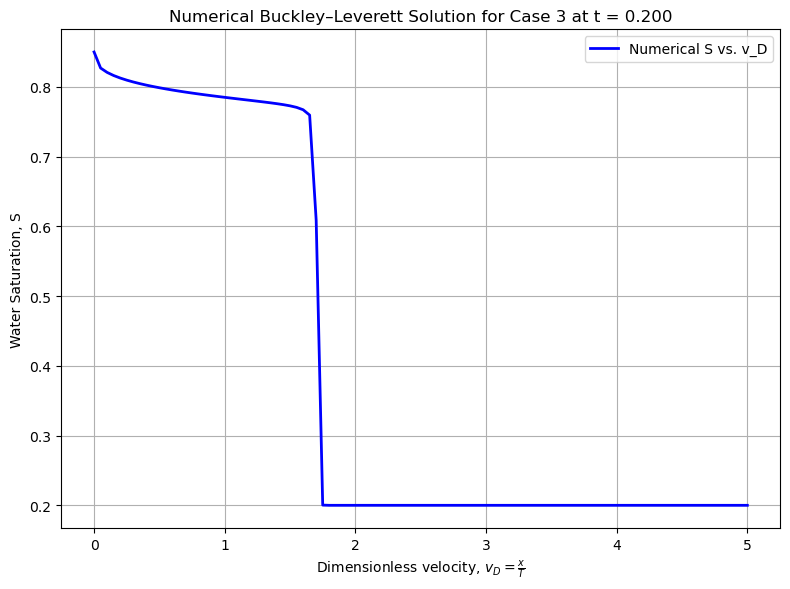

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ============================================================
# 1) Parameters for Case 3 (Dimensionless)
# ============================================================
S1i   = 0.2              # initial water saturation
S2r   = 0.15             # residual CO2 saturation
S_inj = 1.0 - S2r        # injected water saturation = 0.85

mu1 = 0.4                # viscosity of water (Phase 1)
mu2 = 0.1                # viscosity of CO2   (Phase 2)
a   = 8.0                # exponent for water rel-perm
b   = 3.0                # exponent for CO2 rel-perm
kr1_star = 0.4           # multiplier for water rel-perm
kr2_star = 0.8           # multiplier for CO2 rel-perm

dx = 0.01                # dimensionless spatial step
dt = 0.001               # dimensionless time step
n_max = 200              # total number of time steps
T = n_max * dt           # final time, T = 0.2

# ============================================================
# 2) Spatial Grid
# ============================================================
L = 1.0                  # dimensionless domain length (x_D from 0 to 1)
N = int(L/dx) + 1        # number of grid points
x = np.linspace(0, L, N) # spatial grid (cell centers)

# ============================================================
# 3) Define Relative Permeability and Fractional Flow Functions
# ============================================================
def effective_saturation(S):
    """
    Effective saturation for Case 3:
       S_e = (S - S1i)/(1 - S1i - S2r) = (S - 0.2)/0.65.
    """
    return (S - S1i) / (1.0 - S1i - S2r)

def kr_water(S):
    """
    Relative permeability for water (Phase 1):
       k_{r1}(S) = kr1_star * (S_e)^a.
    """
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return kr1_star * (Se**a)

def kr_co2(S):
    """
    Relative permeability for CO2 (Phase 2):
       k_{r2}(S) = kr2_star * (1 - S_e)^b.
    """
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return kr2_star * ((1 - Se)**b)

def f_water(S):
    """
    Fractional flow for water (Phase 1):
    f(S) = [kr_water(S)/mu1] / ([kr_water(S)/mu1] + [kr_co2(S)/mu2])
         = 1 / (1 + (mu1/mu2)*(kr_co2(S)/kr_water(S))).
    """
    k1 = kr_water(S) + 1e-16
    k2 = kr_co2(S)   + 1e-16
    return (k1/mu1) / ((k1/mu1) + (k2/mu2))

# ============================================================
# 4) Initialize the Saturation Array
# ============================================================
# At t=0, for x > 0, S(x,0) = S1i (0.2)
S = np.ones(N) * S1i

# ============================================================
# 5) Time-stepping Using the Upwind Scheme
# ============================================================
for n in range(n_max):
    S_new = S.copy()
    # Boundary condition at x=0 for t>0: S(0,t) = S_inj (0.85)
    S_new[0] = S_inj
    # Update interior cells (j=1 to N-1)
    for j in range(1, N):
        flux_j = f_water(S[j])
        flux_jm1 = f_water(S[j-1])
        S_new[j] = S[j] - (dt/dx)*(flux_j - flux_jm1)
    S = S_new.copy()

# ============================================================
# 6) Compute Similarity Variable and Save Numerical Results
# ============================================================
# At final time T, define v_D = x/T
vD = x / T

# Plot the numerical saturation profile S vs. v_D
plt.figure(figsize=(8,6))
plt.plot(vD, S, 'b-', linewidth=2, label='Numerical S vs. v_D')
plt.xlabel(r"Dimensionless velocity, $v_D = \frac{x}{T}$")
plt.ylabel("Water Saturation, S")
plt.title("Numerical Buckley–Leverett Solution for Case 3 at t = {:.3f}".format(T))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# 7) Save the Numerical Results in a DataFrame
# ============================================================
case3df_numerical = pd.DataFrame({
    'x': x,
    'vD': vD,
    'S': S
})



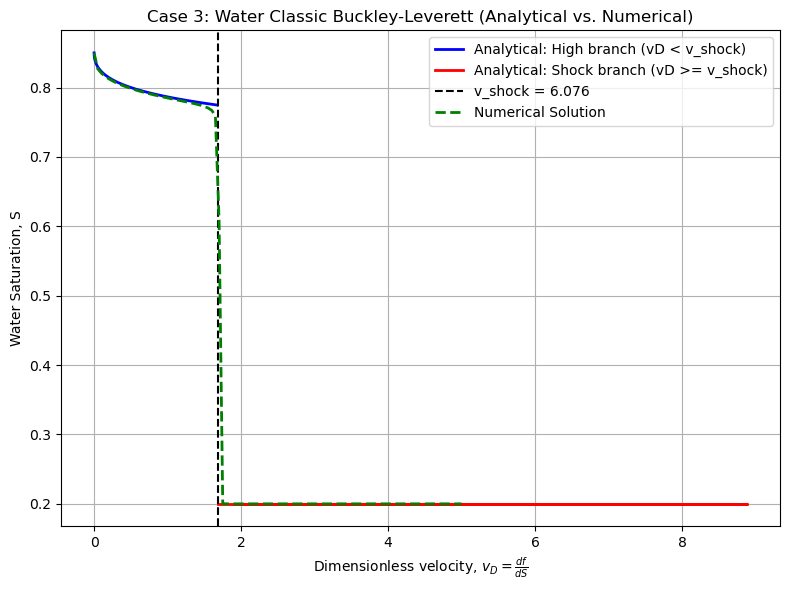

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plot Analytical Solution (from your case1df_anal DataFrame)
plt.plot(case3df_anal.loc[case3df_anal['branch']=='high', 'vD'],
         case3df_anal.loc[case3df_anal['branch']=='high', 'S'],
         'b-', linewidth=2, label='Analytical: High branch (vD < v_shock)')
plt.plot(case3df_anal.loc[case3df_anal['branch']=='shock', 'vD'],
         case3df_anal.loc[case3df_anal['branch']=='shock', 'S'],
         'r-', linewidth=2, label='Analytical: Shock branch (vD >= v_shock)')
plt.axvline(v_shock, color='k', linestyle='--', label=f"v_shock = {v_int:.3f}")

# Plot Numerical Solution (from your results_df_numerical DataFrame)
plt.plot(case3df_numerical['vD'], case3df_numerical['S'],
         'g--', linewidth=2, label='Numerical Solution')

plt.xlabel(r"Dimensionless velocity, $v_D = \frac{df}{dS}$")
plt.ylabel("Water Saturation, S")
plt.title("Case 3: Water Classic Buckley-Leverett (Analytical vs. Numerical)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


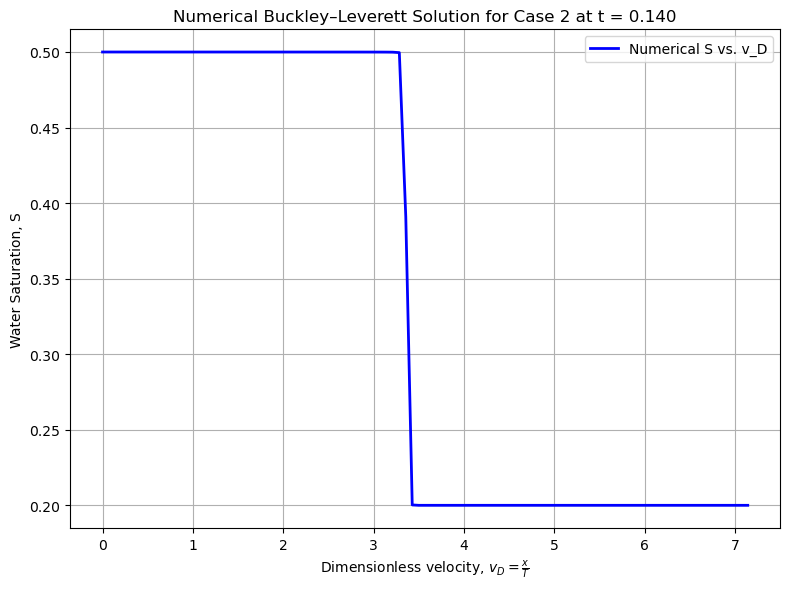

In [199]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# 1) Parameters (Dimensionless)
# ---------------------------
S1i = 0.2            # initial CO2 saturation in the reservoir (t=0, x>0)
S2r = 0.5            # residual water saturation
S_inj = 1.0 - S2r    # injected CO2 saturation at x=0 for t>0, so S_inj = 0.8

mu1 = 1.0            # viscosity of CO2 (Phase 1)
mu2 = 0.1            # viscosity of water (Phase 2)
a = 4.0              # exponent for CO2 relative permeability
b = 1.5              # exponent for water relative permeability
kr1_star = 0.15      # multiplier for water
kr2_star = 1.0       # multiplier for h2 rel-perm

dx = 0.01            # delta_x (dimensionless)
dt = 0.0001           # delta_t (dimensionless)
n_max = 1400       # total number of time steps
T = n_max * dt       # final dimensionless time, T = 0.2

# ============================================================
# 2) Spatial Grid
# ============================================================
L = 1.0                  # dimensionless domain length (x_D from 0 to 1)
N = int(L/dx) + 1        # number of grid points
x = np.linspace(0, L, N) # spatial grid (cell centers)

# ============================================================
# 3) Define Relative Permeability and Fractional Flow Functions
# ============================================================
def effective_saturation(S):
    """
    Effective saturation for Case 3:
       S_e = (S - S1i)/(1 - S1i - S2r) = (S - 0.2)/0.65.
    """
    return (S - S1i) / (1.0 - S1i - S2r)

def kr_water(S):
    """
    Relative permeability for water (Phase 1):
       k_{r1}(S) = kr1_star * (S_e)^a.
    """
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return kr1_star * (Se**a)

def kr_co2(S):
    """
    Relative permeability for CO2 (Phase 2):
       k_{r2}(S) = kr2_star * (1 - S_e)^b.
    """
    Se = effective_saturation(S)
    Se = np.clip(Se, 0, 1)
    return kr2_star * ((1 - Se)**b)

def f_water(S):
    """
    Fractional flow for water (Phase 1):
    f(S) = [kr_water(S)/mu1] / ([kr_water(S)/mu1] + [kr_co2(S)/mu2])
         = 1 / (1 + (mu1/mu2)*(kr_co2(S)/kr_water(S))).
    """
    k1 = kr_water(S) + 1e-16
    k2 = kr_co2(S)   + 1e-16
    return (k1/mu1) / ((k1/mu1) + (k2/mu2))

# ============================================================
# 4) Initialize the Saturation Array
# ============================================================
# At t=0, for x > 0, S(x,0) = S1i (0.2)
S = np.ones(N) * S1i

# ============================================================
# 5) Time-stepping Using the Upwind Scheme
# ============================================================
for n in range(n_max):
    S_new = S.copy()
    # Boundary condition at x=0 for t>0: S(0,t) = S_inj (0.85)
    S_new[0] = S_inj
    # Update interior cells (j=1 to N-1)
    for j in range(1, N):
        flux_j = f_water(S[j])
        flux_jm1 = f_water(S[j-1])
        S_new[j] = S[j] - (dt/dx)*(flux_j - flux_jm1)
    S = S_new.copy()

# ============================================================
# 6) Compute Similarity Variable and Save Numerical Results
# ============================================================
# At final time T, define v_D = x/T
vD = x / T

# Plot the numerical saturation profile S vs. v_D
plt.figure(figsize=(8,6))
plt.plot(vD, S, 'b-', linewidth=2, label='Numerical S vs. v_D')
plt.xlabel(r"Dimensionless velocity, $v_D = \frac{x}{T}$")
plt.ylabel("Water Saturation, S")
plt.title("Numerical Buckley–Leverett Solution for Case 2 at t = {:.3f}".format(T))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ============================================================
# 7) Save the Numerical Results in a DataFrame
# ============================================================
case2df_numerical = pd.DataFrame({
    'x': x,
    'vD': vD,
    'S': S
})


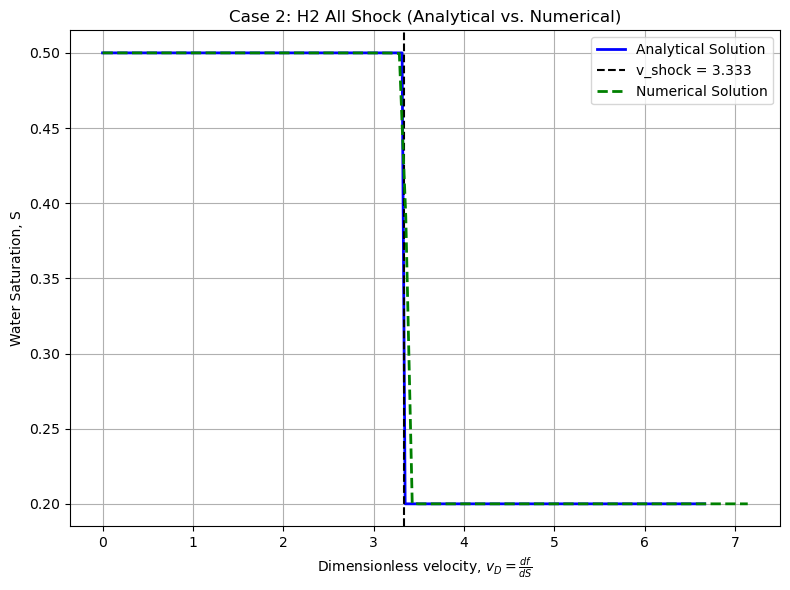

In [341]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

v_shock_case2 = 3.333

# Plot Analytical Solution (from your results_df_analytical DataFrame)
plt.plot(df_shock['vD'], df_shock['S_step'],
         'b-', linewidth=2, label='Analytical Solution')
plt.axvline(v_shock_case2, color='k', linestyle='--', label=f"v_shock = {v_shock_case2:.3f}")

# Plot Numerical Solution (from your results_df_numerical DataFrame)
plt.plot(case2df_numerical['vD'], case2df_numerical['S'],
         'g--', linewidth=2, label='Numerical Solution')

plt.xlabel(r"Dimensionless velocity, $v_D = \frac{df}{dS}$")
plt.ylabel("Water Saturation, S")
plt.title("Case 2: H2 All Shock (Analytical vs. Numerical)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Spontaneous Imbibition (Analytical)**

Case 2

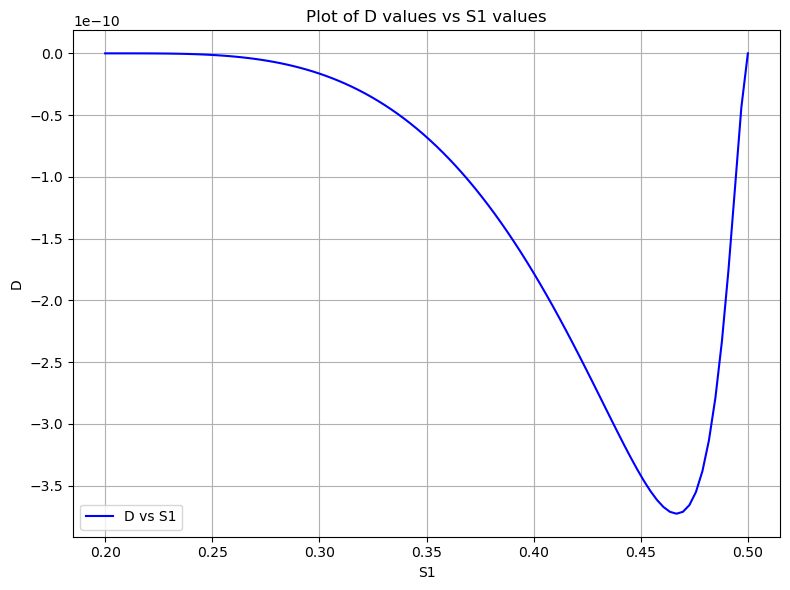

Iteration 1: C^2 = -1.32970625948322e-12
Iteration 2: C^2 = -1.1204836598698033e-12
Iteration 3: C^2 = -1.1265871733025979e-12
Iteration 4: C^2 = -1.1262210775277664e-12
Computed C: nan


/tmp/ipykernel_22871/3342833747.py:98: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(C_squared), F1_interp


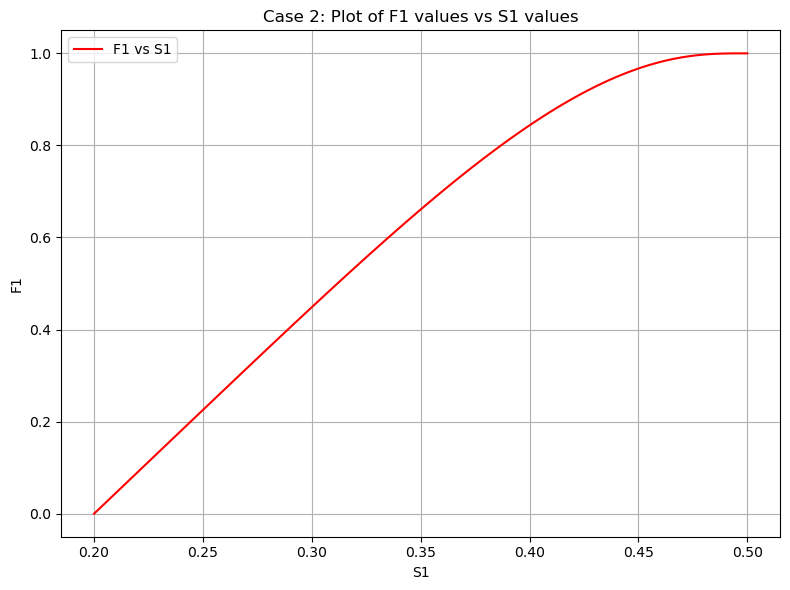

In [347]:
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Parameters for Case 2
mu1 = 1.0  # mPa.s (water)
mu2 = 0.1  # mPa.s (hydrogen)
kr1_max = 0.15
kr2_max = 1.0
a = 4.0
b = 1.5
S1i = 0.2
S2r = 0.5
S1_star = 0.5
K = 1e-13  # m^2
phi = 0.25
Pc_max = 100e3  # Pa
alpha = 0.3

# Define functions
def effective_saturation(S1):
    return (S1 - S1i) / (1 - S2r - S1i)

def relative_permeability_1(S1):
    Se = effective_saturation(S1)
    return kr1_max * Se**a

def relative_permeability_2(S1):
    Se = effective_saturation(S1)
    return kr2_max * (1 - Se)**b

def capillary_pressure(S1):
    if S1 < S1i:
        return 0.0
    else:
        return Pc_max * ((S1_star / S1i)**(-alpha) - (S1 / S1i)**(-alpha))

def dPc_dS1(S1):
    if S1 < S1i:
        return 0.0
    else:
        return Pc_max * alpha * (S1 / S1i)**(-alpha - 1) / S1i

def D(S1):
    kr1 = relative_permeability_1(S1)
    kr2 = relative_permeability_2(S1)
    numerator = (kr1 / mu1) * (kr2 / mu2)
    denominator = (kr1 / mu1) + (kr2 / mu2)
    return - (numerator / denominator) * K * dPc_dS1(S1)

# Plot D vs S1
S1_values = np.linspace(S1i, S1_star, 100)
D_values = [D(S1) for S1 in S1_values]

plt.figure(figsize=(8, 6))
plt.plot(S1_values, D_values, 'b-', label="D vs S1")
plt.xlabel("S1")
plt.ylabel("D")
plt.title("Plot of D values vs S1 values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Define the integral equation for C^2
def calculate_C_squared(F1_interp):
    integrand = lambda beta: (beta - S1i) * D(beta) / F1_interp(beta)
    integral, _ = quad(integrand, S1i, S1_star)
    return (phi / 2) * integral

# Define the equation for F1(S1) from the image
def calculate_F1(S1_values, C_squared, F1_interp):
    F1_new_values = []
    for S1 in S1_values:
        integrand = lambda beta: (beta - S1) * D(beta) / F1_interp(beta)
        integral, _ = quad(integrand, S1, S1_star)
        F1_new = 1 - (phi / (2 * C_squared)) * integral
        F1_new_values.append(F1_new)
    return interp1d(S1_values, F1_new_values, kind='linear', fill_value="extrapolate")

# Iterative process to solve for C and F1
def solve_for_C_and_F1(S1_values, num_iterations=4):
    # Initial guess for F1(S1)
    F1_initial_values = (S1_values - S1i) / (S1_star - S1i)
    F1_interp = interp1d(S1_values, F1_initial_values, kind='linear', fill_value="extrapolate")
    
    C_squared = 0.0
    
    for iteration in range(num_iterations):
        # Calculate C^2 using the current F1
        C_squared = calculate_C_squared(F1_interp)
        print(f"Iteration {iteration + 1}: C^2 = {C_squared}")
        
        # Calculate the new F1(S1) using the equation from the image
        F1_interp = calculate_F1(S1_values, C_squared, F1_interp)
    
    return np.sqrt(C_squared), F1_interp

# Define S1 values for interpolation
S1_values = np.linspace(S1i, S1_star, 100)

# Solve for C and F1 (4 iterations)
C, F1_interp = solve_for_C_and_F1(S1_values, num_iterations=4)

print("Computed C:", C)

# Plot F1 vs S1
F1_values = F1_interp(S1_values)

plt.figure(figsize=(8, 6))
plt.plot(S1_values, F1_values, 'r-', label="F1 vs S1")
plt.xlabel("S1")
plt.ylabel("F1")
plt.title("Case 2: Plot of F1 values vs S1 values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Iteration 1: C^2 = 1.3297062594704274e-09
Iteration 2: C^2 = 1.1204836598584016e-09
Iteration 3: C^2 = 1.1265871732909901e-09
Iteration 4: C^2 = 1.1262210775161866e-09
Computed C: 3.355921747472945e-05


/tmp/ipykernel_22871/3024557297.py:98: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(F1_interp, S1, dx=1e-6)


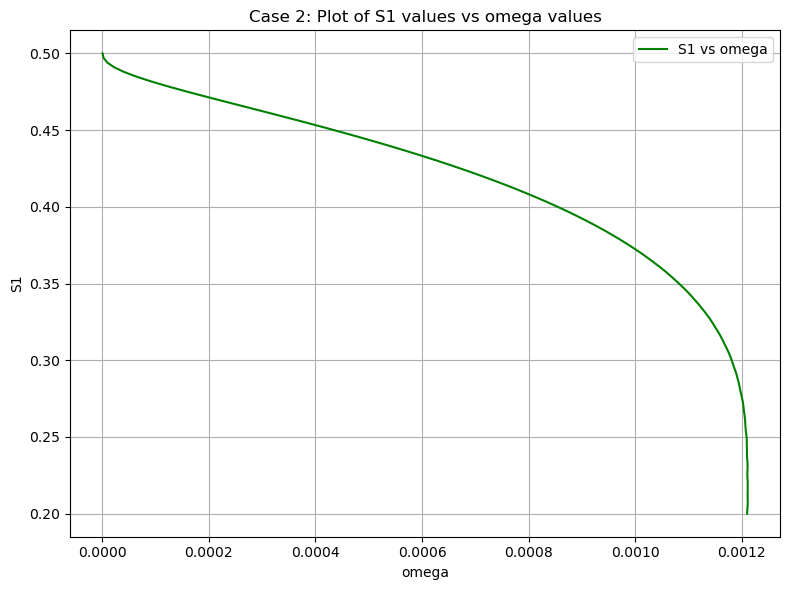

In [344]:
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.misc import derivative
import matplotlib.pyplot as plt

# Parameters for Case 2
mu1 = 1.0e-3  # Pa.s (water)
mu2 = 0.1e-3  # Pa.s (hydrogen)
kr1_max = 0.15
kr2_max = 1.0
a = 4.0
b = 1.5
S1i = 0.2
S2r = 0.5
S1_star = 0.5
K = 1e-13  # m^2
phi = 0.25
Pc_max = 100e3  # Pa
alpha = 0.3

# Define functions
def effective_saturation(S1):
    return (S1 - S1i) / (1 - S2r - S1i)

def relative_permeability_1(S1):
    Se = effective_saturation(S1)
    return kr1_max * Se**a

def relative_permeability_2(S1):
    Se = effective_saturation(S1)
    return kr2_max * (1 - Se)**b

def capillary_pressure(S1):
    if S1 < S1i:
        return 0.0
    else:
        return Pc_max * ((S1_star / S1i)**(-alpha) - (S1 / S1i)**(-alpha))

# Central difference approximation for dPc/dS1
def dPc_dS1(S1, h=1e-6):
    if S1 < S1i:
        return 0.0
    else:
        return (capillary_pressure(S1 + h) - capillary_pressure(S1 - h)) / (2 * h)

def D(S1):
    kr1 = relative_permeability_1(S1)
    kr2 = relative_permeability_2(S1)
    numerator = (kr1 / mu1) * (kr2 / mu2)
    denominator = (kr1 / mu1) + (kr2 / mu2)
    return (numerator / denominator) * K * dPc_dS1(S1)

# Define S1 values for interpolation
S1_values = np.linspace(S1i, S1_star, 100)

# Define the integral equation for C^2
def calculate_C_squared(F1_interp):
    integrand = lambda beta: (beta - S1i) * D(beta) / F1_interp(beta)
    integral, _ = quad(integrand, S1i, S1_star)
    return (phi / 2) * integral

# Define the equation for F1(S1) from the image
def calculate_F1(S1_values, C_squared, F1_interp):
    F1_new_values = []
    for S1 in S1_values:
        integrand = lambda beta: (beta - S1) * D(beta) / F1_interp(beta)
        integral, _ = quad(integrand, S1, S1_star)
        F1_new = 1 - (phi / (2 * C_squared)) * integral
        F1_new_values.append(F1_new)
    return interp1d(S1_values, F1_new_values, kind='linear', fill_value="extrapolate")

# Iterative process to solve for C and F1
def solve_for_C_and_F1(S1_values, num_iterations=4):
    # Initial guess for F1(S1)
    F1_initial_values = (S1_values - S1i) / (S1_star - S1i)
    F1_interp = interp1d(S1_values, F1_initial_values, kind='linear', fill_value="extrapolate")
    
    C_squared = 0.0
    
    for iteration in range(num_iterations):
        # Calculate C^2 using the current F1
        C_squared = calculate_C_squared(F1_interp)
        print(f"Iteration {iteration + 1}: C^2 = {C_squared}")
        
        # Calculate the new F1(S1) using the equation from the image
        F1_interp = calculate_F1(S1_values, C_squared, F1_interp)
    
    return np.sqrt(C_squared), F1_interp

# Solve for C and F1 (4 iterations)
C, F1_interp = solve_for_C_and_F1(S1_values, num_iterations=4)

print("Computed C:", C)

# Compute dF1/dS1 using numerical differentiation
def dF1_dS1(S1, F1_interp):
    return derivative(F1_interp, S1, dx=1e-6)

# Compute omega values
omega_values = (2 * C / phi) * np.array([dF1_dS1(S1, F1_interp) for S1 in S1_values])

# Plot S1 vs omega
plt.figure(figsize=(8, 6))
plt.plot(omega_values, S1_values, 'g-', label="S1 vs omega")
plt.xlabel("omega")
plt.ylabel("S1")
plt.title("Case 2: Plot of S1 values vs omega values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the results in a DataFrame
case2imb_df = pd.DataFrame({
    'S1': S1_values,
    'F1': F1_interp(S1_values),
    'dF1_dS1': [dF1_dS1(S1, F1_interp) for S1 in S1_values],
    'omega': omega_values
})

In [257]:
print("dF1/dS1 values:", [dF1_dS1(S1, F1_interp) for S1 in S1_values])
print("omega values:", omega_values)

dF1/dS1 values: [4.506654654924983, 4.50800136913513, 4.510814029157554, 4.510506042720852, 4.510028398563986, 4.510438814012141, 4.5106587392984565, 4.510486478877252, 4.508253605546575, 4.508238683607891, 4.509841152355865, 4.50912955246574, 4.506108549351406, 4.5055058738169285, 4.505199587445663, 4.503896618379688, 4.5042399834244184, 4.501169542786565, 4.496720599808657, 4.494266430621341, 4.49260534138296, 4.489388607309408, 4.484560820666728, 4.481007788437186, 4.476839535610955, 4.4702271227992085, 4.462044697034484, 4.4557171435255505, 4.449102992049037, 4.440459833776611, 4.432113305724572, 4.421035794649475, 4.409379679465308, 4.398708040587174, 4.386805053296916, 4.372533357416275, 4.356527770726926, 4.340663221524821, 4.324449635995098, 4.306093234207609, 4.285556331196094, 4.265628364419349, 4.244451046575559, 4.219980212272212, 4.1950304391913384, 4.168441612273366, 4.140147898235025, 4.111595908184995, 4.080748522761191, 4.047456284794748, 4.012541434172956, 3.976609552

/tmp/ipykernel_22871/303897550.py:98: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(F1_interp, S1, dx=1e-6)


Case 3

Iteration 1: C^2 = 1.2775524761631423e-11
Iteration 2: C^2 = 1.2019909462249771e-11
Iteration 3: C^2 = 1.2034787660885277e-11
Iteration 4: C^2 = 1.2034330101603942e-11
Computed C: 3.469053199592641e-06


/tmp/ipykernel_22871/3147875853.py:98: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(F1_interp, S1, dx=1e-6)


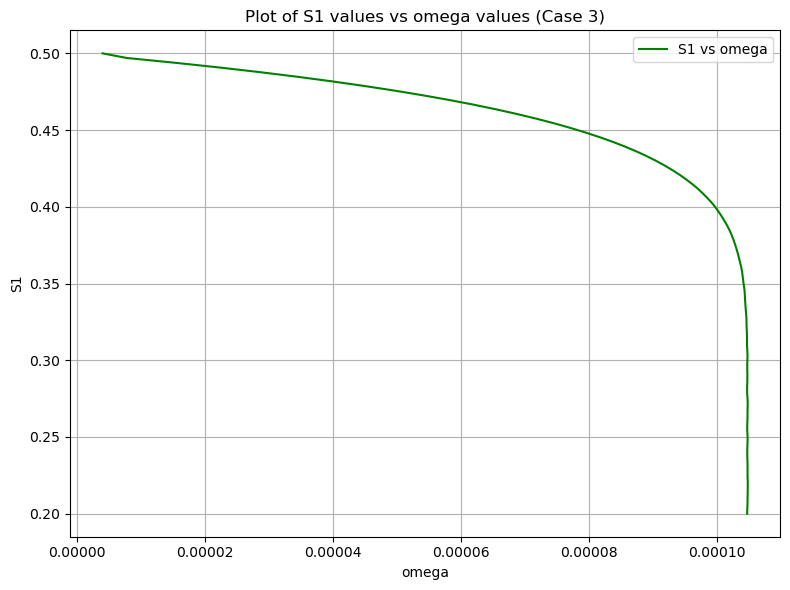

In [277]:
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.misc import derivative
import matplotlib.pyplot as plt

# Parameters for Case 3
mu1 = 0.4e-3  # mPa.s (water)
mu2 = 0.1e-3  # mPa.s (CO₂)
kr1_max = 0.4
kr2_max = 0.8
a = 8.0
b = 3.0
S1i = 0.2
S2r = 0.15
S1_star = 0.5
K = 1e-13  # m^2
phi = 0.25
Pc_max = 100e3  # Pa
alpha = 0.3

# Define functions
def effective_saturation(S1):
    return (S1 - S1i) / (1 - S2r - S1i)

def relative_permeability_1(S1):
    Se = effective_saturation(S1)
    return kr1_max * Se**a

def relative_permeability_2(S1):
    Se = effective_saturation(S1)
    return kr2_max * (1 - Se)**b

def capillary_pressure(S1):
    if S1 < S1i:
        return 0.0
    else:
        return Pc_max * ((S1_star / S1i)**(-alpha) - (S1 / S1i)**(-alpha))

# Central difference approximation for dPc/dS1
def dPc_dS1(S1, h=1e-6):
    if S1 < S1i:
        return 0.0
    else:
        return (capillary_pressure(S1 + h) - capillary_pressure(S1 - h)) / (2 * h)

def D(S1):
    kr1 = relative_permeability_1(S1)
    kr2 = relative_permeability_2(S1)
    numerator = (kr1 / mu1) * (kr2 / mu2)
    denominator = (kr1 / mu1) + (kr2 / mu2)
    return (numerator / denominator) * K * dPc_dS1(S1)

# Define S1 values for interpolation
S1_values = np.linspace(S1i, S1_star, 100)

# Define the integral equation for C^2
def calculate_C_squared(F1_interp):
    integrand = lambda beta: (beta - S1i) * D(beta) / F1_interp(beta)
    integral, _ = quad(integrand, S1i, S1_star)
    return (phi / 2) * integral

# Define the equation for F1(S1) from the image
def calculate_F1(S1_values, C_squared, F1_interp):
    F1_new_values = []
    for S1 in S1_values:
        integrand = lambda beta: (beta - S1) * D(beta) / F1_interp(beta)
        integral, _ = quad(integrand, S1, S1_star)
        F1_new = 1 - (phi / (2 * C_squared)) * integral
        F1_new_values.append(F1_new)
    return interp1d(S1_values, F1_new_values, kind='linear', fill_value="extrapolate")

# Iterative process to solve for C and F1
def solve_for_C_and_F1(S1_values, num_iterations=4):
    # Initial guess for F1(S1)
    F1_initial_values = (S1_values - S1i) / (S1_star - S1i)
    F1_interp = interp1d(S1_values, F1_initial_values, kind='linear', fill_value="extrapolate")
    
    C_squared = 0.0
    
    for iteration in range(num_iterations):
        # Calculate C^2 using the current F1
        C_squared = calculate_C_squared(F1_interp)
        print(f"Iteration {iteration + 1}: C^2 = {C_squared}")
        
        # Calculate the new F1(S1) using the equation from the image
        F1_interp = calculate_F1(S1_values, C_squared, F1_interp)
    
    return np.sqrt(C_squared), F1_interp

# Solve for C and F1 (4 iterations)
C, F1_interp = solve_for_C_and_F1(S1_values, num_iterations=4)

print("Computed C:", C)

# Compute dF1/dS1 using numerical differentiation
def dF1_dS1(S1, F1_interp):
    return derivative(F1_interp, S1, dx=1e-6)

# Compute omega values
omega_values = (2 * C / phi) * np.array([dF1_dS1(S1, F1_interp) for S1 in S1_values])

# Plot S1 vs omega
plt.figure(figsize=(8, 6))
plt.plot(omega_values, S1_values, 'g-', label="S1 vs omega")
plt.xlabel("omega")
plt.ylabel("S1")
plt.title("Plot of S1 values vs omega values (Case 3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the results in a DataFrame
case3imb_df = pd.DataFrame({
    'S1': S1_values,
    'F1': F1_interp(S1_values),
    'dF1_dS1': [dF1_dS1(S1, F1_interp) for S1 in S1_values],
    'omega': omega_values
})


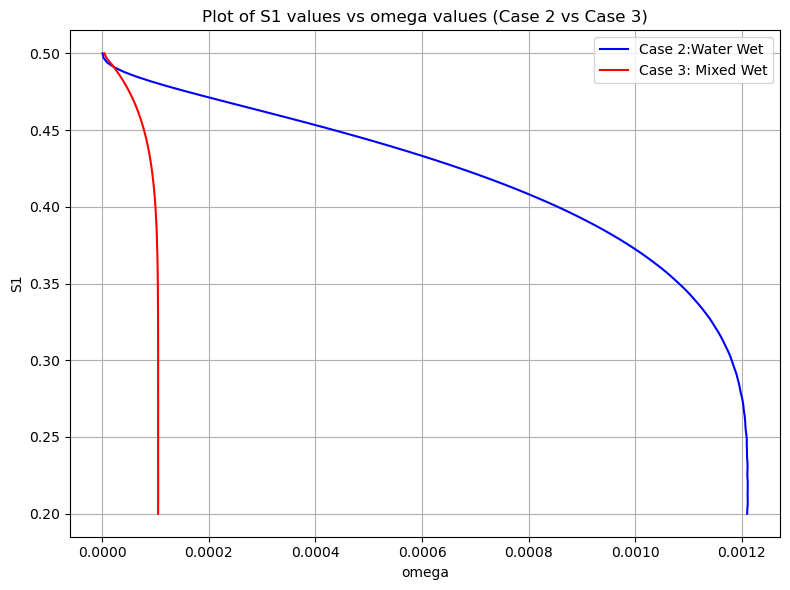

In [260]:
#plot S1 vs omega case2 and case3
plt.figure(figsize=(8, 6))
plt.plot(case2imb_df['omega'], case2imb_df['S1'], 'b-', label="Case 2:Water Wet")
plt.plot(case3imb_df['omega'], case3imb_df['S1'], 'r-', label="Case 3: Mixed Wet")
plt.xlabel("omega")
plt.ylabel("S1")
plt.title("Plot of S1 values vs omega values (Case 2 vs Case 3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Spontaneous Imbibition (Numerical)**

Case 2

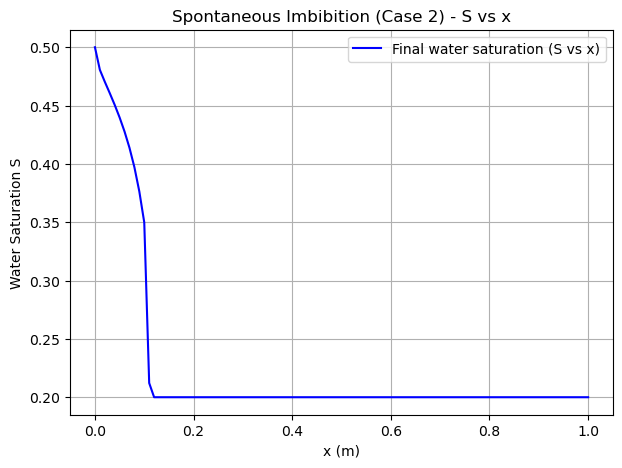

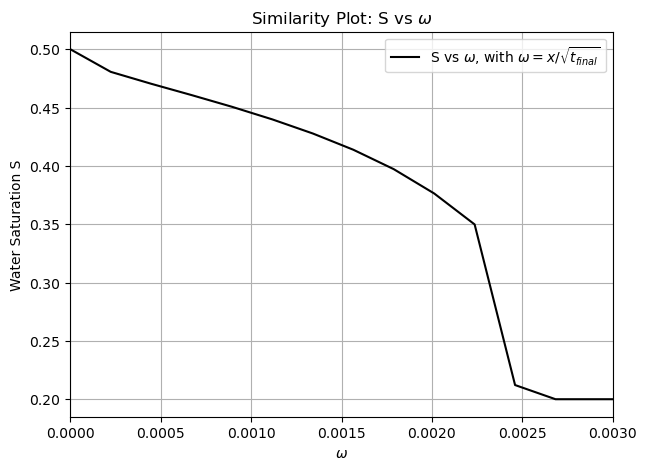

In [336]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# 1. Define physical / numerical parameters for Case 2
# ------------------------------------------------------------------------------
L   = 1.0         # length of the 1D domain (m)
Nx  = 101         # number of grid points
dx  = L/(Nx-1)    # spatial step

phi = 0.25        # porosity
K   = 1e-13       # absolute permeability (m^2)

# Viscosities in Pa.s (Case 2: water (phase 1), hydrogen (phase 2))
mu1 = 1.0e-3      # water: 1 mPa.s = 1e-3 Pa.s 
mu2 = 0.1e-3      # hydrogen: 0.1 mPa.s = 1e-4 Pa.s

# Corey exponents from the table
a = 4.0
b = 1.5

# Residual saturations
S_wi = 0.2      # irreducible water saturation
S_nr = 0.5      # residual non-wetting saturation

# End-point relative permeabilities from table:
krw0 = 0.15   # for water (phase 1)
krn0 = 1.0    # for non-wetting phase (phase 2)

# Capillary pressure parameters (adjust based on your PDF)
Pc0 = 100e3   # 100 kPa in Pa
c   = 0.3     # exponent parameter in Pc formula
S_star = 0.5  # saturation at which Pc = 0 (boundary condition)

# Time stepping
dt   = 0.1        # time step (s) -- adjust for stability
nt   = 20000       # number of time steps

# Initial and boundary saturations
S_init = 0.2      # initial water saturation in the domain
S_leftBC = S_star # water saturation at x = 0 (boundary condition)

# ------------------------------------------------------------------------------
# 2. Define helper functions for effective saturation, relative permeability,
#    capillary pressure, its derivative, and the diffusion coefficient
# ------------------------------------------------------------------------------

def effective_saturation(S):
    """
    Compute the effective saturation:
       S_e = (S - S_wi)/(1 - S_wi - S_nr)
    Clipped to [0,1].
    """
    denom = (1.0 - S_wi - S_nr)
    S_e  = np.clip((S - S_wi) / denom, 0.0, 1.0)
    return S_e

def krw(S):
    """
    Relative permeability for water (wetting phase):
       krw = krw0 * (S_e)^a
    """
    S_e = effective_saturation(S)
    return krw0 * (S_e**a)

def krn(S):
    """
    Relative permeability for non-wetting phase (hydrogen):
       krn = krn0 * (1 - S_e)^b
    """
    S_e = effective_saturation(S)
    return krn0 * ((1.0 - S_e)**b)

def Pc(S):
    """
    Compute capillary pressure using the expression from the PDF.
    
    One common form is:
       Pc(S) = Pc0 * ( ((S_star/S_init)^(-c) - (S/S_init)^(-c)) /
                        (((S_star/S_init)^(-c)) - 1) )
       
    This formulation ensures that Pc(S_star) = 0.
    """
    S_safe = np.maximum(S, S_wi + 1e-8)  # avoid division by zero
    return Pc0 * (((S_star / S_init)**(-c) - (S_safe / S_init)**(-c)) /
                  (((S_star / S_init)**(-c)) - 1))

def dPc_dS1(S1, h=1e-6):
    """
    Compute the numerical derivative of capillary pressure Pc with respect to S1
    using a central difference method.
    
    For S1 values less than S_wi, the derivative is set to 0.
    """
    S1_arr = np.array(S1, ndmin=1)
    central_diff = (Pc(S1_arr + h) - Pc(S1_arr - h)) / (2 * h)
    result = np.where(S1_arr < S_wi, 0.0, central_diff)
    if result.size == 1:
        return result.item()
    return result

def D(S):
    """
    Compute the diffusion coefficient for spontaneous imbibition.
    
    Here we use a harmonic averaging formulation between the two phase mobilities:
    
      D(S) = [ (krw(S)/mu1) * (krn(S)/mu2) / ((krw(S)/mu1) + (krn(S)/mu2) ) ]
             * K * dPc/dS
    """
    kr1 = krw(S)
    kr2 = krn(S)
    numerator = (kr1 / mu1) * (kr2 / mu2)
    denominator = (kr1 / mu1) + (kr2 / mu2)
    return (numerator / denominator) * K * dPc_dS1(S)

# ------------------------------------------------------------------------------
# 3. Set up the spatial grid and initialize saturation (finite-difference simulation)
# ------------------------------------------------------------------------------
x = np.linspace(0, L, Nx)
S = np.ones(Nx) * S_init   # water saturation at time n
Snew = np.copy(S)          # water saturation at time n+1

for n in range(nt):

    # Update interior points
    for i in range(1, Nx-1):
        S_minus = 0.5*(S[i] + S[i-1])
        S_plus  = 0.5*(S[i+1] + S[i])
        
        flux_left  = D(S_minus) * (S[i] - S[i-1])
        flux_right = D(S_plus)  * (S[i+1] - S[i])
        
        Snew[i] = S[i] + (dt / (phi * dx**2)) * (flux_left - flux_right)
    
    # Now enforce boundary conditions in Snew
    Snew[0]   = S_leftBC
    Snew[-1]  = S_init  # or no-flow if desired
    
    # Copy Snew to S
    S[:] = Snew[:]


# ------------------------------------------------------------------------------
# 4. Plot the finite-difference saturation profile (S vs x)
# ------------------------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(x, S, 'b-', label='Final water saturation (S vs x)')
plt.xlabel('x (m)')
plt.ylabel('Water Saturation S')
plt.title('Spontaneous Imbibition (Case 2) - S vs x')
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 5. Compute and plot S vs omega using the similarity variable:
#    omega = x/sqrt(t_final)
# ------------------------------------------------------------------------------
t_final = nt * dt  # final simulation time
omega = x / np.sqrt(t_final)

plt.figure(figsize=(7,5))
plt.plot(omega, S, 'k-', label=r'S vs $\omega$, with $\omega = x/\sqrt{t_{final}}$')
plt.xlabel(r'$\omega$')
plt.ylabel('Water Saturation S')
plt.xlim(0, 0.003)
plt.title('Similarity Plot: S vs $\omega$')
plt.grid(True)
plt.legend()
plt.show()

#save the results in a DataFrame
case2imb_numerical = pd.DataFrame({
    'x': x,
    'omega': omega,
    'S': S
})


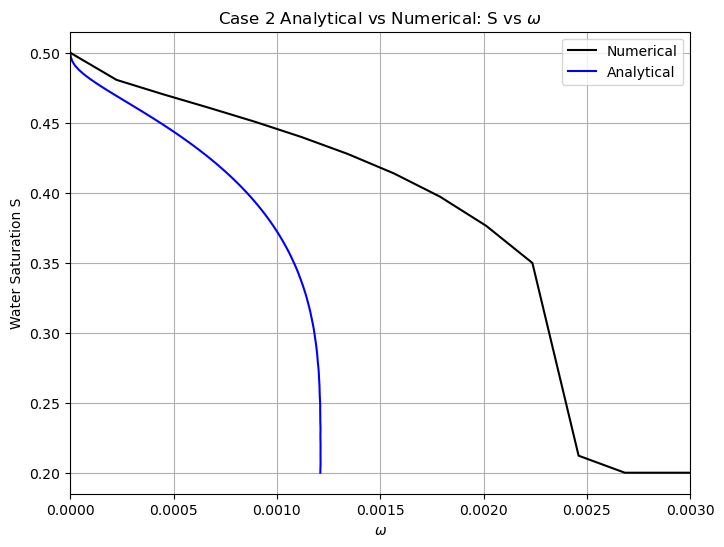

In [338]:
#plot the case 2 numerical and analytical results
plt.figure(figsize=(8,6))

plt.plot(omega, S, 'k-', label='Numerical')
plt.plot(case2imb_df['omega'], case2imb_df['S1'], 'b-', label="Analytical")
plt.xlabel(r'$\omega$')
plt.ylabel('Water Saturation S')
plt.xlim(0, 0.003)
plt.title('Case 2 Analytical vs Numerical: S vs $\omega$')
plt.grid(True)
plt.legend()
plt.show()


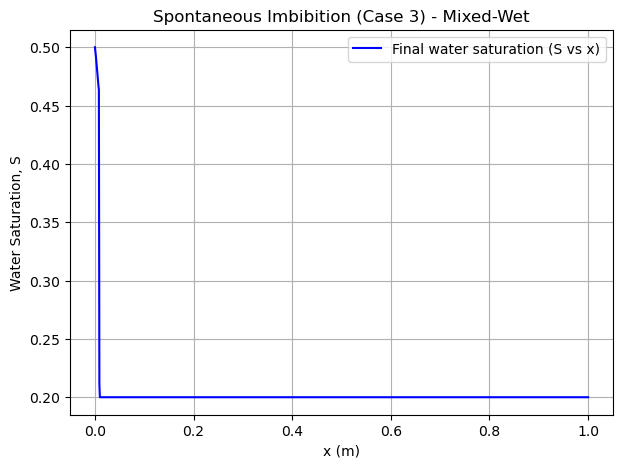

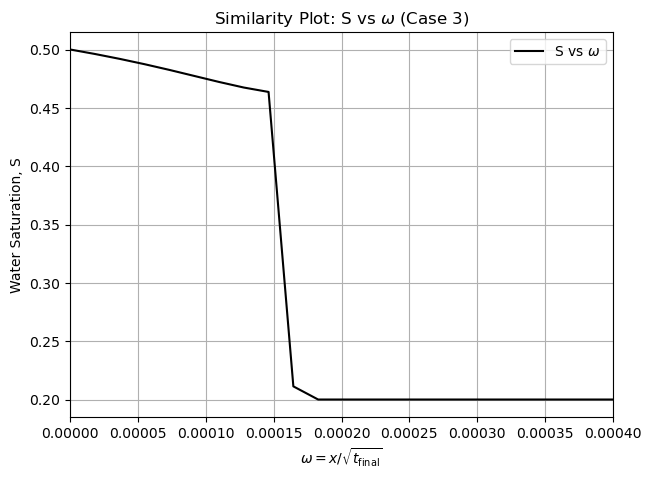

In [345]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------------------------
# 1. Define physical / numerical parameters for Case 3
#    Water (phase 1) displacing CO2 (phase 2), mixed-wet
# ------------------------------------------------------------------------------
L   = 1.0         # length of the 1D domain (m)
Nx  = 1000         # number of grid points
dx  = L/(Nx-1)    # spatial step

phi = 0.25        # porosity
K   = 1e-13       # absolute permeability (m^2)

# Viscosities (Case 3): water = 0.4 mPa.s, CO2 = 0.1 mPa.s
# Convert mPa.s to Pa.s by multiplying by 1e-3
mu1 = 0.4e-3      # water: 0.4 mPa.s
mu2 = 0.1e-3      # CO2:   0.1 mPa.s

# Corey exponents for Case 3
a = 8.0
b = 3.0

# Residual saturations (Case 3)
S_wi = 0.2        # irreducible water saturation
S_nr = 0.15       # residual CO2 saturation

# End-point relative permeabilities
krw0 = 0.4        # for water
krn0 = 0.8        # for CO2

# Capillary pressure parameters
Pc0 = 100e3       # 100 kPa in Pa
c   = 0.3         # exponent
S_star = 0.5      # saturation at which Pc=0

# Time stepping
dt   = 1        # time step (s) -- may need to adjust for stability
nt   = 3000      # number of time steps

# Initial and boundary saturations
S_init   = 0.2    # initial water saturation in the domain
S_leftBC = S_star # water saturation at x=0 (boundary condition, Pc(S_star)=0)

# ------------------------------------------------------------------------------
# 2. Define helper functions: effective saturation, rel perms, Pc, derivative
# ------------------------------------------------------------------------------
def effective_saturation(S):
    """
    Compute the effective saturation:
       S_e = (S - S_wi)/(1 - S_wi - S_nr)
    Clipped to [0,1].
    """
    denom = (1.0 - S_wi - S_nr)
    S_e  = np.clip((S - S_wi)/denom, 0.0, 1.0)
    return S_e

def krw(S):
    """
    Relative permeability for water (phase 1).
       krw = krw0 * (S_e)^a
    """
    S_e = effective_saturation(S)
    return krw0 * (S_e**a)

def krn(S):
    """
    Relative permeability for CO2 (phase 2).
       krn = krn0 * (1 - S_e)^b
    """
    S_e = effective_saturation(S)
    return krn0 * ((1.0 - S_e)**b)

def Pc(S):
    """
    Compute capillary pressure using the expression from the PDF.
    One common form is:
       Pc(S) = Pc0 * (
           ((S_star/S_init)^(-c) - (S/S_init)^(-c)) /
           (((S_star/S_init)^(-c)) - 1)
       )
    This ensures Pc(S_star) = 0.
    """
    S_safe = np.maximum(S, S_wi + 1e-8)  # avoid division by zero
    return Pc0 * (
        ((S_star / S_init)**(-c) - (S_safe / S_init)**(-c)) /
        (((S_star / S_init)**(-c)) - 1)
    )

def dPc_dS1(S1, h=1e-6):
    """
    Compute the numerical derivative of capillary pressure Pc with respect to S1
    using a central difference method.
    
    For S1 values less than S_wi, the derivative is set to 0.
    """
    S1_arr = np.array(S1, ndmin=1)
    # Central difference
    Pc_plus  = Pc(S1_arr + h)
    Pc_minus = Pc(S1_arr - h)
    central_diff = (Pc_plus - Pc_minus) / (2*h)
    
    # If S < S_wi, set derivative to zero
    result = np.where(S1_arr < S_wi, 0.0, central_diff)
    
    # Return scalar if only one element
    if result.size == 1:
        return result.item()
    return result

def D(S):
    """
    Compute the diffusion coefficient for spontaneous imbibition (Case 3).
    We use a harmonic averaging of the phase mobilities:
    
      D(S) = [
        (krw(S)/mu1) * (krn(S)/mu2)
        / ((krw(S)/mu1) + (krn(S)/mu2))
      ] * K * dPc/dS
    """
    kr1 = krw(S)
    kr2 = krn(S)
    numerator = (kr1 / mu1) * (kr2 / mu2)
    denominator = (kr1 / mu1) + (kr2 / mu2)
    return (numerator / denominator) * K * dPc_dS1(S)

# ------------------------------------------------------------------------------
# 3. Set up the spatial grid and initialize saturation (finite-difference simulation)
# ------------------------------------------------------------------------------
x = np.linspace(0, L, Nx)
S = np.ones(Nx)*S_init   # water saturation at time n
Snew = np.copy(S)        # water saturation at time n+1

# ------------------------------------------------------------------------------
# 4. Time-stepping loop for spontaneous imbibition (Case 3)
# ------------------------------------------------------------------------------
for n in range(nt):
    
    # Update interior points (1..Nx-2)
    for i in range(1, Nx-1):
        S_minus = 0.5*(S[i] + S[i-1])  # face-average
        S_plus  = 0.5*(S[i+1] + S[i])  # face-average
        
        flux_left  = D(S_minus)*(S[i]   - S[i-1])
        flux_right = D(S_plus )*(S[i+1] - S[i])
        
        Snew[i] = S[i] + (dt/(phi*dx*dx))*(flux_left - flux_right)
    
    # Enforce boundary conditions on Snew
    Snew[0]  = S_leftBC   # left boundary: S = S_star
    Snew[-1] = S_init     # right boundary: S = S_init or no-flow if desired
    
    # Copy updated saturations back
    S[:] = Snew[:]

# ------------------------------------------------------------------------------
# 5. Plot the final saturation profile (S vs x)
# ------------------------------------------------------------------------------
plt.figure(figsize=(7,5))
plt.plot(x, S, 'b-', label='Final water saturation (S vs x)')
plt.xlabel('x (m)')
plt.ylabel('Water Saturation, S')
plt.title('Spontaneous Imbibition (Case 3) - Mixed-Wet')
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 6. Similarity plot: S vs omega = x / sqrt(t_final)
# ------------------------------------------------------------------------------
t_final = nt * dt
omega = x / np.sqrt(t_final)

plt.figure(figsize=(7,5))
plt.plot(omega, S, 'k-', label=r'S vs $\omega$')
plt.xlabel(r'$\omega = x/\sqrt{t_{\mathrm{final}}}$')
plt.ylabel('Water Saturation, S')
plt.xlim(0, 0.0004)
plt.title('Similarity Plot: S vs $\omega$ (Case 3)')
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------------------------------------------
# 7. Save the results in a DataFrame (optional)
# ------------------------------------------------------------------------------
case3imb_numerical = pd.DataFrame({
    'x': x,
    'omega': omega,
    'S': S
})
case3imb_numerical.to_csv('case3_numerical_solution.csv', index=False)


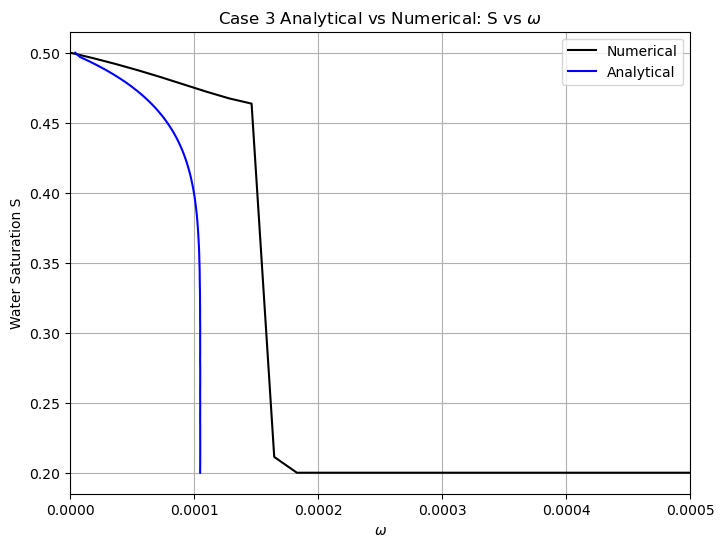

In [346]:
#plot the case 3 numerical and analytical results
plt.figure(figsize=(8,6))

plt.plot(omega, S, 'k-', label="Numerical")
plt.plot(case3imb_df['omega'], case3imb_df['S1'], 'b-', label="Analytical")
plt.xlabel(r'$\omega$')
plt.ylabel('Water Saturation S')
plt.xlim(0, 0.0005)
plt.title('Case 3 Analytical vs Numerical: S vs $\omega$')
plt.grid(True)
plt.legend()
plt.show()